In [9]:
%load_ext autoreload 
%autoreload 2
import cv2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist

import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots.plots import plot_oa

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
#session = plot_oa('D:/obstacle_avoidance/metadata/oa_021523_LT.json')
#session.gather_session_df()
#session.process_df()
#
#df = session.df

session1 = plot_oa('D:/obstacle_avoidance/metadata/oa_021523.json')
session1.gather_session_df()
session1.process_df()

df1 = session1.df

In [213]:
session = plot_oa('D:/obstacle_avoidance/metadata/oa_021523_LT.json')
session.gather_session_df()
session.process_df()

df1 = session.df


In [210]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\021523\J620LT\oa\test_J620LT_021523_oa.h5")

In [174]:
obstacle_cols = list_columns(df,['obstacle'])
obstacle_cols = [col for col in obstacle_cols if 'likelihood' not in col]

In [205]:
 for ind, row in df.iterrows():
            nose_list = row['nose_x_cm']
            middle_time = np.where((nose_list > 25) & (nose_list < 50))
            if len(middle_time[0]) == 0:
                df = df.drop(ind)
            else:
                first,last = [middle_time[0][i] for i in (0, -1)] 
                # calculate median of each corner
                for col in obstacle_cols:
                    #if len(row[col]) == 1:
                         #continue
                    trace = row[col][first:last]
                    #trace = trace.astype('float')
                    #kernel = np.ones(len(trace))
                    #trace = interpolate_replace_nans(trace.astype('float'),kernel)
                    df.at[ind,'gt_'+ col]= np.nanmedian(trace)

In [187]:
x=interpolate_replace_nans(row[col].astype('float'),np.ones(len(row[col])))

In [192]:
col

'obstacleBR_x'

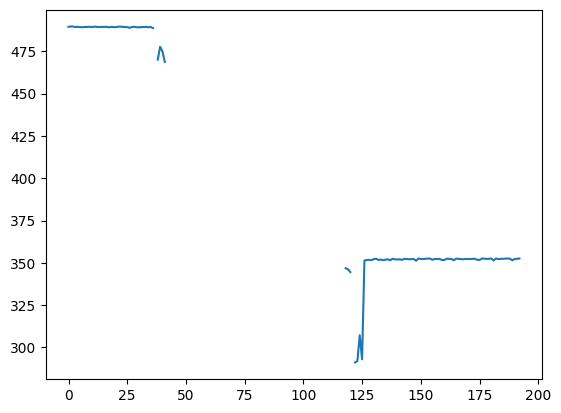

In [195]:
plt.plot(row[col])

In [179]:
interpolate_replace_nans(trace.astype('float'),kernel[:19])

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       173.42033386, 346.5344696 , 345.86315918, 259.39736938,
       207.51789551, 172.93157959, 148.22706822, 129.69868469,
       115.28771973, 346.84066772, 346.22827148, 344.52053833])

In [181]:
np.nanmean(trace)

345.8631591796875

In [182]:
np.nanmedian(trace)

346.228271484375

In [212]:
print(np.sort(df1['mean_gt_obstacle_cen_x_cm'].unique()),np.sort(df1['mean_gt_obstacle_cen_y_cm'].unique()))
#



[26.46468845 26.89953466 27.76665075 34.18015868 34.27729642 34.55697157
 40.56369866 40.89489185 41.54974491] [15.3072649  15.72263862 15.72909902 22.14438885 23.26718546 23.33124337
 27.41899308 27.72430988 27.8133939 ]


In [59]:
x_pos,y_pos  = np.sort(df['mean_gt_obstacle_cen_x_cm'].unique()),np.sort(df['mean_gt_obstacle_cen_y_cm'].unique())
col_1, col_2, col_3 = x_pos[0:3],x_pos[3:6],x_pos[6:9]
row_1, row_2, row_3 = y_pos[0:3],y_pos[3:6],y_pos[6:9]
df['cluster_label'] = np.nan
for ind, row in df.iterrows():
    if row['mean_gt_obstacle_cen_x_cm'] in col_1 and row['mean_gt_obstacle_cen_y_cm'] in row_1: 
        df.at[ind,'cluster_label'] = 0

    if row['mean_gt_obstacle_cen_x_cm'] in col_2 and row['mean_gt_obstacle_cen_y_cm'] in row_1:
        df.at[ind,'cluster_label'] = 1

    if row['mean_gt_obstacle_cen_x_cm'] in col_3 and row['mean_gt_obstacle_cen_y_cm'] in row_1:
        df.at[ind,'cluster_label'] = 2

    if row['mean_gt_obstacle_cen_x_cm'] in col_1 and row['mean_gt_obstacle_cen_y_cm'] in row_2:
        df.at[ind,'cluster_label'] = 3

    if row['mean_gt_obstacle_cen_x_cm'] in col_2 and row['mean_gt_obstacle_cen_y_cm'] in row_2:
        df.at[ind,'cluster_label'] = 4

    if row['mean_gt_obstacle_cen_x_cm'] in col_3 and row['mean_gt_obstacle_cen_y_cm'] in row_2:
        df.at[ind,'cluster_label'] = 5
    
    if row['mean_gt_obstacle_cen_x_cm'] in col_1 and row['mean_gt_obstacle_cen_y_cm'] in row_3:
        df.at[ind,'cluster_label'] = 6
    
    if row['mean_gt_obstacle_cen_x_cm'] in col_2 and row['mean_gt_obstacle_cen_y_cm'] in row_3:
        df.at[ind,'cluster_label'] = 7

    if row['mean_gt_obstacle_cen_x_cm'] in col_3 and row['mean_gt_obstacle_cen_y_cm'] in row_3:
        df.at[ind,'cluster_label'] = 8



    



In [82]:
df1['cluster_label']

0      4.0
1      4.0
2      2.0
3      2.0
4      2.0
      ... 
101    0.0
102    0.0
103    4.0
104    4.0
105    8.0
Name: cluster_label, Length: 96, dtype: float64

(0.0, 72.0)

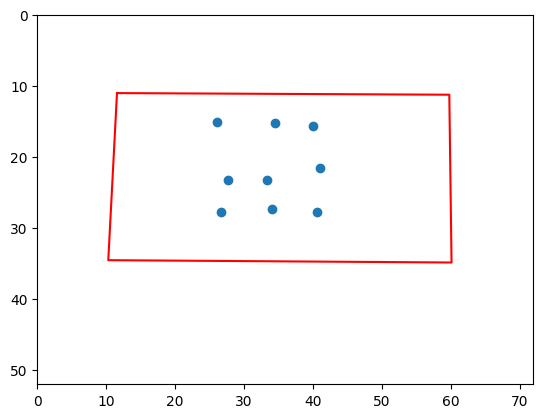

In [34]:
plt.scatter(df['mean_gt_obstacle_cen_x_cm'].unique(),df['mean_gt_obstacle_cen_y_cm'].unique())
plt.plot([df['mean_arenaTL_x_cm'].unique(), df['mean_arenaTR_x_cm'].unique(), df['mean_arenaBR_x_cm'].unique(), df['mean_arenaBL_x_cm'].unique(),df['mean_arenaTL_x_cm'].unique()],
                            [df['mean_arenaTL_y_cm'].unique(), df['mean_arenaTR_y_cm'].unique(), df['mean_arenaBR_y_cm'].unique(), df['mean_arenaBL_y_cm'].unique(),df['mean_arenaTL_y_cm'].unique()],color='red')

plt.ylim([52,0]); plt.xlim([0, 72])

(0.0, 72.0)

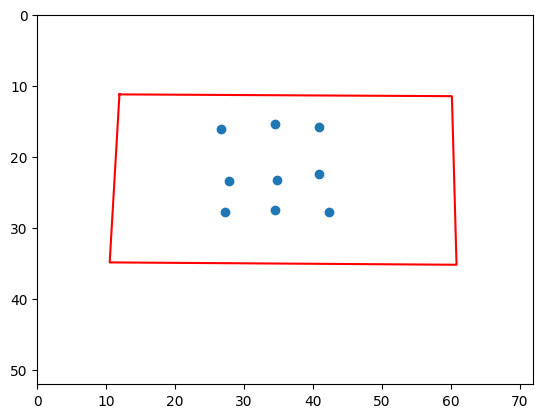

In [35]:
plt.scatter(df1['mean_gt_obstacle_cen_x_cm'].unique(),df1['mean_gt_obstacle_cen_y_cm'].unique())
plt.plot([df1['mean_arenaTL_x_cm'].unique(), df1['mean_arenaTR_x_cm'].unique(), df1['mean_arenaBR_x_cm'].unique(), df1['mean_arenaBL_x_cm'].unique(),df1['mean_arenaTL_x_cm'].unique()],
                            [df1['mean_arenaTL_y_cm'].unique(), df1['mean_arenaTR_y_cm'].unique(), df1['mean_arenaBR_y_cm'].unique(), df1['mean_arenaBL_y_cm'].unique(),df1['mean_arenaTL_y_cm'].unique()],color='red')

plt.ylim([52,0]); plt.xlim([0, 72])

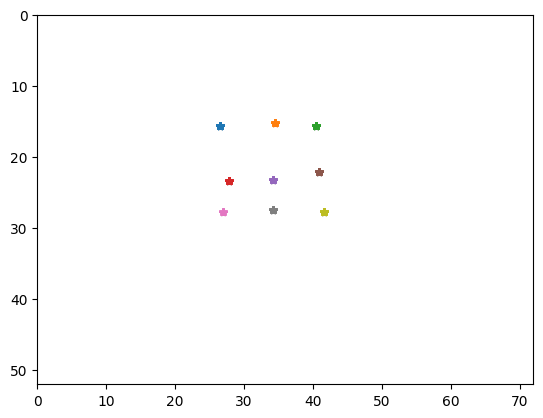

In [75]:
# plot gt postions
gt_label = df['cluster_label'].astype('int').tolist()
#create obstacle_xypos array 
obstacle_xpos = np.array(df.loc[:,'mean_gt_obstacle_cen_x_cm'])
obstacle_ypos = np.array(df.loc[:,'mean_gt_obstacle_cen_y_cm'])
obstacle_xypos_ar = np.stack((obstacle_xpos, obstacle_ypos))
plt.figure()
for i in range(len(df['cluster_label'])):
    obstacle_xypos = obstacle_xypos_ar[:,i] 
    plt.plot(obstacle_xypos[0], obstacle_xypos[1], '*', color=list(mcolors.TABLEAU_COLORS)[gt_label[i]])
    plt.ylim([52,0]); plt.xlim([0, 72])

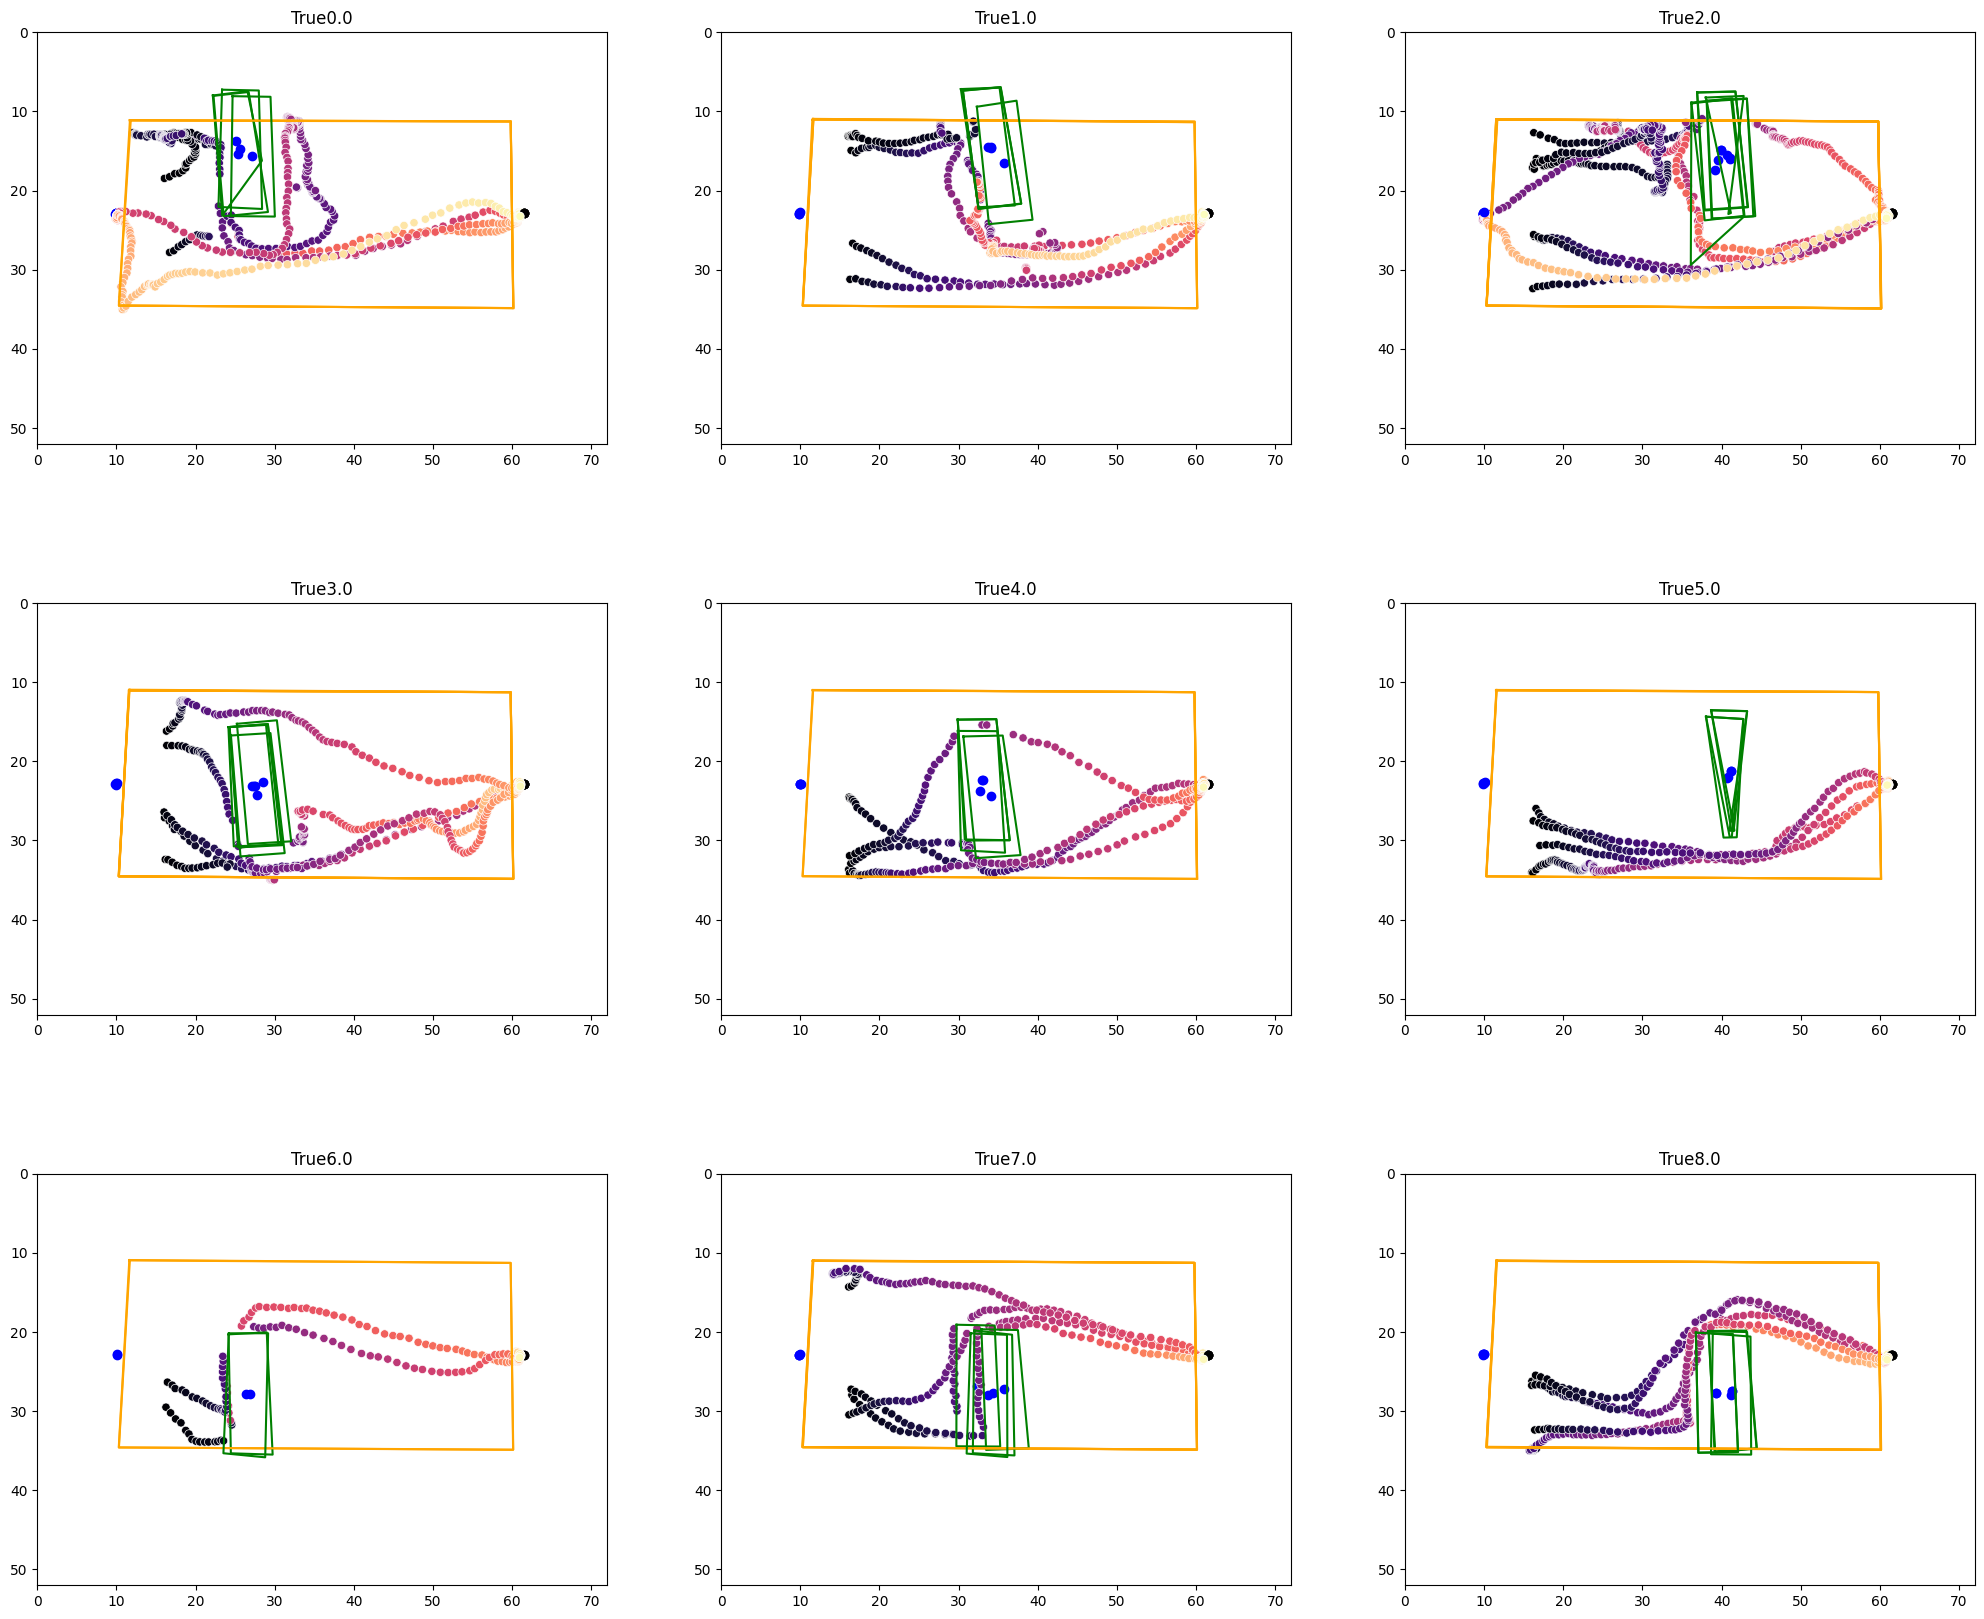

In [224]:
plt.subplots(3,3, figsize=(25,21))


for clusters, cluster_name in enumerate(df1['cluster_label'].unique()):
    x=df1.loc[df1['cluster_label']==cluster_name]
    for i, row in x.iterrows():
        if row['odd'] == True:
            plt.subplot(3,3,int(cluster_name)+1)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.gca().set_title(str(row['odd'])+str(row['cluster_label']))
    
            plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')


            plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    
   
    
    
            plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
            plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
            plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
            sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
            #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
            plt.ylim([52,0]); plt.xlim([0, 72])

In [ ]:
for ind, row in df.iterrows():
    spine_x = row['ts_midspine_x_cm']
    spine_y = row['ts_midspine_y_cm']
    tail_x = row['ts_tailbase_x_cm']
    tail_y = row['ts_tailbase_y_cm']
    angs = []
    for step in range(len(spine_x)):
        ang = np.arctan2(spine_y[step]-tail_y[step],spine_x[step]-tail_x[step])
        angs.append(ang)
    df.at[ind, 'body_angle_tailbase'] = np.array(angs).astype(object)

In [ ]:
## plot traces by cluster/animal
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_cluster_trace_121322_1'
pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_direction = animal_frame.groupby(['odd'])
    for direction,direction_frame in by_direction:
        fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
        if direction == False:
            fig.suptitle('Right Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            right_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in right_by_cluster:
                plt.subplot(3,3,cluster+1)
                plt.gca().set_title(str(cluster))
                plt.plot([cluster_frame['mean_arenaTL_x_cm'].unique(), cluster_frame['mean_arenaTR_x_cm'].unique(), cluster_frame['mean_arenaBR_x_cm'].unique(), cluster_frame['mean_arenaBL_x_cm'].unique(),cluster_frame['mean_arenaTL_x_cm'].unique()],
                            [cluster_frame['mean_arenaTL_y_cm'].unique(), cluster_frame['mean_arenaTR_y_cm'].unique(), cluster_frame['mean_arenaBR_y_cm'].unique(), cluster_frame['mean_arenaBL_y_cm'].unique(),cluster_frame['mean_arenaTL_y_cm'].unique()],color='red')
                plt.scatter(cluster_frame['mean_leftportT_x_cm'].unique(),cluster_frame['mean_leftportT_y_cm'].unique(),color='blue')
                plt.scatter(cluster_frame['mean_rightportT_x_cm'].unique(),cluster_frame['mean_rightportT_y_cm'].unique(),color='black')
                for ind,row in cluster_frame.iterrows():
                    plt.subplot(3,3,cluster+1)
                    #plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                            #[row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')


                    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')




                    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                    #plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                    #plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                    sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
                        #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                    plt.ylim([52,0]); plt.xlim([0, 72])
            pdf.savefig(); plt.close()
               

        if direction ==True:
            fig.suptitle('Left Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            left_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in left_by_cluster:
                plt.subplot(3,3,cluster+1)
                plt.gca().set_title(str(cluster))
                plt.plot([cluster_frame['mean_arenaTL_x_cm'].unique(), cluster_frame['mean_arenaTR_x_cm'].unique(), cluster_frame['mean_arenaBR_x_cm'].unique(), cluster_frame['mean_arenaBL_x_cm'].unique(),cluster_frame['mean_arenaTL_x_cm'].unique()],
                            [cluster_frame['mean_arenaTL_y_cm'].unique(), cluster_frame['mean_arenaTR_y_cm'].unique(), cluster_frame['mean_arenaBR_y_cm'].unique(), cluster_frame['mean_arenaBL_y_cm'].unique(),cluster_frame['mean_arenaTL_y_cm'].unique()],color='red')
                plt.scatter(cluster_frame['mean_leftportT_x_cm'].unique(),cluster_frame['mean_leftportT_y_cm'].unique(),color='blue')
                plt.scatter(cluster_frame['mean_rightportT_x_cm'].unique(),cluster_frame['mean_rightportT_y_cm'].unique(),color='black')
                for ind,row in cluster_frame.iterrows():
                    plt.subplot(3,3,cluster+1)
                    #plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                            #[row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')


                    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')




                    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                    #plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                   # plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                    sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
                        #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                    plt.ylim([52,0]); plt.xlim([0, 72])
            pdf.savefig(); plt.close()
            
pdf.close()





In [ ]:
for ind,row in df.iterrows():
    if row['nose_x_cm'][0] <= 20:
        df.at[ind,'odd'] = True 
    elif row['nose_x_cm'][0] >=20:
        df.at[ind,'odd'] = False

In [ ]:
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_head_body direction_121322_1'
pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_cluster = animal_frame.groupby(['cluster_label'])
    for cluster,cluster_frame in by_cluster:
        cluster_frame = cluster_frame.reset_index()
        y = nearestX_roundup(len(cluster_frame),4)
        fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(cluster_frame)),dpi = 100)
        fig.suptitle(str(cluster) + '_' +str(animal) , size = 20)
        for ind,row in cluster_frame.iterrows():
            plt.subplot(int((y/4)),4,ind+1)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.gca().set_title(str(row['odd'])+str(ind))
            for indx,i in enumerate(row['head_angle']):
                    current_ang = i
                    x1 = row['ts_nose_x_cm'][indx]
                    y1 = row['ts_nose_y_cm'][indx]
                    x2 = x1-3 * np.cos(current_ang)
                    y2 = y1-3* np.sin(current_ang)
                    plt.plot((x1,x2), (y1,y2), '-',color = 'black',alpha=0.3)
            for indx,i in enumerate(row['body_angle']):
                    current_ang = i
                    x1 = row['ts_midspine_x_cm'][indx]
                    y1 = row['ts_midspine_y_cm'][indx]
                    x2 = x1-3 * np.cos(current_ang)
                    y2 = y1-3* np.sin(current_ang)
                    plt.plot((x1,x2), (y1,y2), '-',color = 'red',alpha=0.3)
            plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                        [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')


            plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                    [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')

            sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = enumerate(row['obstacle_intersect_nose_x']), palette ='magma',legend=False)    
            plt.scatter(row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm'],color = 'blue')
            plt.scatter(row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'],color = 'red')
            plt.scatter(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm'],color = 'orange')
            plt.scatter(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'],color = 'green')
            plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
            plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
            plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
            plt.scatter(row['ts_nose_x_cm'],row['ts_nose_y_cm'], color = 'c',s=1)
            plt.scatter(row['ts_spine_x_cm'],row['ts_spine_y_cm'], color = 'm',s=1)

            plt.ylim([52,0]); plt.xlim([0, 72])
        pdf.savefig(); plt.close()
pdf.close()


    
    

In [ ]:
test = df.sample(30)
test = test.reset_index()

In [ ]:
def facing_angle(df):
    for ind,row in df.iterrows():
        if np.mean(row['head_angle'][:10]) > 0:
            df.at[ind,'facing_angle'] = True ## True means facing dowm postive value
        elif np.mean(row['head_angle'][:10]) == 0:
            df.at[ind,'facing_angle'] = np.nan
        else: 
            df.at[ind,'facing_angle'] = False



In [123]:
df.columns.to_numpy()

array(['first_poke', 'second_poke', 'trial_timestamps', 'trial_vidframes',
       'nose_x', 'nose_y', 'nose_likelihood', 'leftear_x', 'leftear_y',
       'leftear_likelihood', 'rightear_x', 'rightear_y',
       'rightear_likelihood', 'spine_x', 'spine_y', 'spine_likelihood',
       'midspine_x', 'midspine_y', 'midspine_likelihood', 'tailbase_x',
       'tailbase_y', 'tailbase_likelihood', 'midtail_x', 'midtail_y',
       'midtail_likelihood', 'tailend_x', 'tailend_y',
       'tailend_likelihood', 'arenaTL_x', 'arenaTL_y',
       'arenaTL_likelihood', 'arenaTR_x', 'arenaTR_y',
       'arenaTR_likelihood', 'arenaBL_x', 'arenaBL_y',
       'arenaBL_likelihood', 'arenaBR_x', 'arenaBR_y',
       'arenaBR_likelihood', 'obstacleTL_x', 'obstacleTL_y',
       'obstacleTL_likelihood', 'obstacleTR_x', 'obstacleTR_y',
       'obstacleTR_likelihood', 'obstacleBR_x', 'obstacleBR_y',
       'obstacleBR_likelihood', 'obstacleBL_x', 'obstacleBL_y',
       'obstacleBL_likelihood', 'leftportT_x', 'leftpo

In [ ]:
def right_left(df):
    for ind, row in df.iterrows():
        nose_x = row['ts_nose_x_cm']
        cen_x = row['gt_obstacle_cen_x_cm']
        

         

In [ ]:
plt.plot([df.at[0,'mean_arenaTL_x_cm'], df.at[0,'mean_arenaTR_x_cm'], df.at[0,'mean_arenaBR_x_cm'], df.at[0,'mean_arenaBL_x_cm'],df.at[0,'mean_arenaTL_x_cm']],
            [df.at[0,'mean_arenaTL_y_cm'], df.at[0,'mean_arenaTR_y_cm'], df.at[0,'mean_arenaBR_y_cm'], df.at[0,'mean_arenaBL_y_cm'],df.at[0,'mean_arenaTL_y_cm']],color='green')

True


(0.0, 72.0)

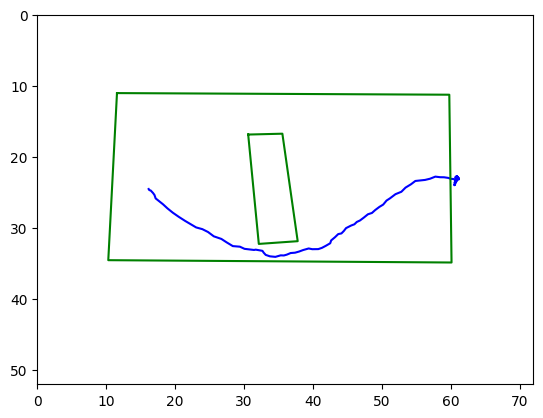

In [16]:
print(df.at[0,'odd'])
plt.plot(df.at[0,'ts_nose_x_cm'],df.at[0,'ts_nose_y_cm'],c ='b')

#plt.plot(df.at[1158,'interp_ts_nose_x_cm'],df.at[1158,'interp_ts_nose_y_cm'],c = 'r')

plt.plot([df.at[0,'mean_arenaTL_x_cm'], df.at[0,'mean_arenaTR_x_cm'], df.at[0,'mean_arenaBR_x_cm'], df.at[0,'mean_arenaBL_x_cm'],df.at[0,'mean_arenaTL_x_cm']],
            [df.at[0,'mean_arenaTL_y_cm'], df.at[0,'mean_arenaTR_y_cm'], df.at[0,'mean_arenaBR_y_cm'], df.at[0,'mean_arenaBL_y_cm'],df.at[0,'mean_arenaTL_y_cm']],color='green')

plt.plot([df.at[0,'gt_obstacleTL_x_cm'], df.at[0,'gt_obstacleTR_x_cm'], df.at[0,'gt_obstacleBR_x_cm'], df.at[0,'gt_obstacleBL_x_cm'],df.at[0,'gt_obstacleTL_x_cm']],
            [df.at[0,'gt_obstacleTL_y_cm'], df.at[0,'gt_obstacleTR_y_cm'], df.at[0,'gt_obstacleBR_y_cm'], df.at[0,'gt_obstacleBL_y_cm'],df.at[0,'gt_obstacleTL_y_cm']],color='green')

plt.ylim([52,0]); plt.xlim([0, 72])

False


(0.0, 72.0)

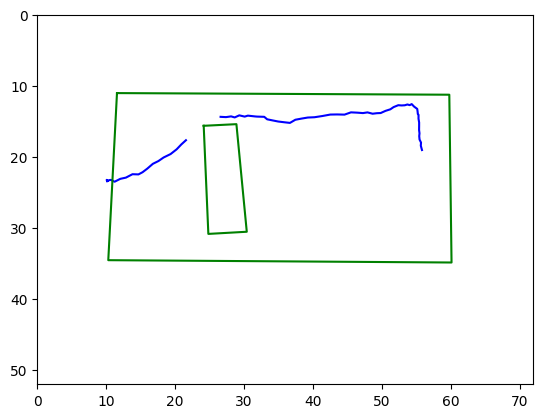

In [96]:
print(df.at[5,'odd'])
plt.plot(df.at[5,'ts_nose_x_cm'],df.at[5,'ts_nose_y_cm'],c ='b')

#plt.plot(df.at[1158,'interp_ts_nose_x_cm'],df.at[1158,'interp_ts_nose_y_cm'],c = 'r')

plt.plot([df.at[5,'mean_arenaTL_x_cm'], df.at[5,'mean_arenaTR_x_cm'], df.at[5,'mean_arenaBR_x_cm'], df.at[5,'mean_arenaBL_x_cm'],df.at[5,'mean_arenaTL_x_cm']],
            [df.at[5,'mean_arenaTL_y_cm'], df.at[5,'mean_arenaTR_y_cm'], df.at[5,'mean_arenaBR_y_cm'], df.at[5,'mean_arenaBL_y_cm'],df.at[5,'mean_arenaTL_y_cm']],color='green')

plt.plot([df.at[5,'gt_obstacleTL_x_cm'], df.at[5,'gt_obstacleTR_x_cm'], df.at[5,'gt_obstacleBR_x_cm'], df.at[5,'gt_obstacleBL_x_cm'],df.at[5,'gt_obstacleTL_x_cm']],
            [df.at[5,'gt_obstacleTL_y_cm'], df.at[5,'gt_obstacleTR_y_cm'], df.at[5,'gt_obstacleBR_y_cm'], df.at[5,'gt_obstacleBL_y_cm'],df.at[5,'gt_obstacleTL_y_cm']],color='green')

plt.ylim([52,0]); plt.xlim([0, 72])

In [99]:
plt.plot(df.at[5,'ts_nose_x_cm'].fillna())

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

In [100]:
df.at[5,'ts_nose_x_cm']

array([55.83433621100467, 55.66280144561031, 55.69538585573962,
       55.481685576058716, 55.433455455470494, 55.47397633075998,
       55.412410568304125, 55.42031457348409, 55.42206200241847,
       55.32955646883036, 55.33484203560711, 55.23134338872284,
       55.19929997826361, 55.144085551934566, 54.69311904694377,
       54.34060366191534, 54.055312895891866, 53.71079889598401,
       53.331834037085045, 52.87144872783804, 52.39430324881176,
       51.71518636295204, 51.24386204037589, 50.543624527395984,
       49.83747929801874, 49.28642785406192, 48.668903780641564,
       47.9189375779873, 47.26386271746623, 46.40841780913518,
       45.523401858837204, 44.590207182919656, 43.52262007395755,
       42.524145672849, 41.382108894287924, 40.22957401712882,
       39.26036228817526, 38.34842348929541, 37.45371011991113,
       36.66660428990542, 35.88933924389859, 34.96781122586647,
       34.16105899284157, 33.361117945663054, 32.93378501125999,
       31.87937935925954, 31.60

In [111]:
-np.isnan(df.at[5,'ts_nose_x_cm'].astype('float'))

TypeError: The numpy boolean negative, the `-` operator, is not supported, use the `~` operator or the logical_not function instead.

In [114]:
print(x, xp, fp)

[54 55 56 57 58] [54 55 56 57 58] [nan nan nan nan nan]


In [154]:
## testing replace nans
from astropy.convolution import interpolate_replace_nans
from astropy.convolution import Gaussian2DKernel

In [113]:
test=df.at[5,'ts_nose_x_cm'].astype('float')
ok = np.isnan(test)
xp = ok.ravel().nonzero()[0]
fp = test[np.isnan(test)]
x  = np.isnan(test).ravel().nonzero()[0]

test[np.isnan(test)] = np.interp(x, xp, fp)

print(test)

[55.83433621 55.66280145 55.69538586 55.48168558 55.43345546 55.47397633
 55.41241057 55.42031457 55.422062   55.32955647 55.33484204 55.23134339
 55.19929998 55.14408555 54.69311905 54.34060366 54.0553129  53.7107989
 53.33183404 52.87144873 52.39430325 51.71518636 51.24386204 50.54362453
 49.8374793  49.28642785 48.66890378 47.91893758 47.26386272 46.40841781
 45.52340186 44.59020718 43.52262007 42.52414567 41.38210889 40.22957402
 39.26036229 38.34842349 37.45371012 36.66660429 35.88933924 34.96781123
 34.16105899 33.36111795 32.93378501 31.87937936 31.60324231 30.55994879
 30.09861673 29.31269569 28.64655198 28.12865299 27.38017724 26.59835698
         nan         nan         nan         nan         nan 21.57118382
 20.90351584 20.22396209 19.34005925 18.3260798  17.57917024 16.76990507
 15.95464021 15.27307394 14.67832325 13.81050568 12.85443889 12.0442202
 11.20978164 10.68069951 10.40204411 10.30632571 10.21627699 10.14790275
 10.10992795 10.07895505 10.06147129 10.0873189  10.1

In [130]:
np.where(df['gt_obstacleBL_x_cm'].isnull())

(array([], dtype=int64),)

In [122]:
kernel = np.ones(len(test))
interpolate_replace_nans(test,kernel)

array([55.83433621, 55.66280145, 55.69538586, 55.48168558, 55.43345546,
       55.47397633, 55.41241057, 55.42031457, 55.422062  , 55.32955647,
       55.33484204, 55.23134339, 55.19929998, 55.14408555, 54.69311905,
       54.34060366, 54.0553129 , 53.7107989 , 53.33183404, 52.87144873,
       52.39430325, 51.71518636, 51.24386204, 50.54362453, 49.8374793 ,
       49.28642785, 48.66890378, 47.91893758, 47.26386272, 46.40841781,
       45.52340186, 44.59020718, 43.52262007, 42.52414567, 41.38210889,
       40.22957402, 39.26036229, 38.34842349, 37.45371012, 36.66660429,
       35.88933924, 34.96781123, 34.16105899, 33.36111795, 32.93378501,
       31.87937936, 31.60324231, 30.55994879, 30.09861673, 29.31269569,
       28.64655198, 28.12865299, 27.38017724, 26.59835698, 26.2977001 ,
       25.59072464, 24.88953081, 24.1928564 , 23.49983957, 21.57118382,
       20.90351584, 20.22396209, 19.34005925, 18.3260798 , 17.57917024,
       16.76990507, 15.95464021, 15.27307394, 14.67832325, 13.81

In [148]:
test = np.argwhere(df.at[5,'ts_nose_x_cm']>=df.at[5,'gt_obstacle_cen_x_cm'])

In [151]:
print(df.at[5,'ts_nose_x_cm'],df.at[5,'gt_obstacle_cen_x_cm'])

[16.147162108785555 16.553195510268214 16.74187519032386
 16.908785679216518 17.23974406125621 17.678984214507 18.25949811591624
 18.58305958901637 19.067979461612257 19.668616481490897
 20.260874077764754 20.816972569883333 21.37563714027109
 21.710067180981007 22.326349104036048 22.944169712374293
 23.552493747480266 24.2112818514838 24.97503233375936 25.802409055292546
 26.37811777078612 27.160231500238407 28.028223102059485
 28.920301539751375 29.757301455493266 30.412656367958654
 31.120082954883117 31.731216693428106 32.40153852586699
 33.060349069030906 33.25220389028033 33.34762802259366 33.40744120738385
 33.5230189113128 33.59753615734061 33.40291170258142 32.966780975840436
 32.68808980951456 32.61166844044879 32.7499738082484 32.783042719459914
 32.81340290345412 32.91156140773948 32.74139563779454 32.76465222473129
 32.69083059267527 32.80449455678324 32.798692431027824 32.627686795365804
 32.154675705743045 32.16753655023515 31.984708682647188
 31.954258742011458 31.80351

In [7]:
right

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,obstacle_intersect_body_y,all_obstacle_intersect_nose_x,all_obstacle_intersect_nose_y,obstacle_intersect_nose_x,obstacle_intersect_nose_y,normalized_counts_intersect_nose_y,sum_normalized_counts_intersect_nose_y,bins_intersect_nose_y,mean_normalized_counts_intersect_nose_y,facing_angle
1,54994.300480,55007.392537,"[54994.317478, 54994.333721, 54994.350387, 549...","[[749, 750, 751, 752, 753, 754, 755, 756, 757,...","[569.2864990234375, 569.2193603515625, 568.796...","[258.95068359375, 258.351318359375, 258.500427...","[0.9951784610748291, 0.9959314465522766, 0.997...","[564.2037963867188, nan, nan, 563.220397949218...","[261.7225036621094, nan, nan, 259.137145996093...","[0.996788501739502, 0.9819933176040649, 0.9842...",...,"[16.64763998399845, 18.2988587186315, 20.21781...","[50.18850533196205, 50.19210559938958, 50.1959...","[18.819020972265747, 19.622235503782363, 20.47...","[50.18850533196205, 50.19210559938958, 50.1959...","[18.819020972265747, 19.622235503782363, 20.47...","[0, 0, 0, 0, 0.025, 0.175, 0.07499999999999998...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.0, 0.025132625994694957, 0.0217380320828596...",False
4,55026.874713,55030.753984,"[55026.87822, 55026.896179, 55026.911628, 5502...","[[2702, 2703, 2704, 2705, 2706, 2707, 2708, 27...","[569.4076538085938, 569.504150390625, 569.1824...","[258.5302734375, 258.6011962890625, 258.704528...","[0.9999992847442627, 0.9999994039535522, 0.999...","[559.6817016601562, 559.5265502929688, 559.330...","[246.50709533691406, 246.5774688720703, 246.78...","[0.9999991655349731, 0.9999991655349731, 0.999...",...,"[38.03089778008775, 36.849197231672576, 37.655...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.731373592875...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.408190347605...","[38.73137359287577, 38.65622474917655, 38.6282...","[42.408190347605014, 38.5716970831311, 37.1417...","[0, 0, 0.3333333333333333, 0.1111111111111111,...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.030303030303030307, 0.18073769302217577, 0....",True
6,55035.444403,55039.126873,"[55035.447872, 55035.464524, 55035.481664, 550...","[[3216, 3217, 3218, 3219, 3220, 3221, 3222, 32...","[569.5528564453125, 569.843994140625, 569.4065...","[257.44287109375, 257.307861328125, 257.387817...","[0.999998927116394, 0.9999992847442627, 0.9999...","[554.6173095703125, 554.6605224609375, 554.862...","[250.03273010253906, 249.80686950683594, 249.8...","[0.9999991655349731, 0.9999991655349731, 0.999...",...,"[38.32179437155793, 37.336719956321296, 35.184...","[0.0, 0.0, 0.0, 0.0, 38.760453478348936, 38.70...","[0.0, 0.0, 0.0, 0.0, 43.29006496826983, 39.793...","[38.760453478348936, 38.70161560137967, 38.646...","[43.29006496826983, 39.793222572933324, 36.488...","[0, 0.045454545454545456, 0.40909090909090917,...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.030303030303030307, 0.18073769302217577, 0....",True
8,55042.281177,55047.807078,"[55042.283673, 55042.300467, 55042.317772, 550...","[[3626, 3627, 3628, 3629, 3630, 3631, 3632, 36...","[566.4303588867188, 567.2401733398438, 567.769...","[260.4405822753906, 260.06689453125, 259.48678...","[0.9999991655349731, 0.9999983310699463, 0.999...","[559.9876098632812, 560.5786743164062, 560.548...","[247.10633850097656, 247.01780700683594, 246.5...","[0.9999991655349731, 0.9999984502792358, 0.999...",...,"[32.014735534055475, 30.330428412181476, 29.12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 39.249736216393...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 37.777044003864...","[39.24973621639329, 39.254969091590475, 39.260...","[37.77704400386495, 35.10428474338168, 32.0973...","[0, 0, 0.20833333333333331, 0.2500000000000000...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.01433541030850735, 0.06023259411680532, 0.4...",True
10,55050.609011,55053.791795,"[55050.619955, 55050.63648, 55050.653286, 5505...","[[4126, 

In [81]:
test = right.sample(30)
test = test.reset_index()

NameError: name 'right' is not defined

In [16]:
test['head_angle'][7]

array([2.5287183920464273, 2.7396949431603463, 2.8561312771138967,
       3.1190290108391006, -3.1074894561110646, -3.0278724881941503,
       -3.0051868096211076, -2.9591367041544903, -2.920192880007862,
       -2.8335094164767964, -2.804839857889668, -2.8129082711919984,
       -2.8425531677142843, -2.9716362851576936, -3.0825659793670734,
       -3.1263598078685626, 2.9586732221607805, 2.9568407682580684,
       2.982926634333146, 3.009126928422131, 3.0345365172008827,
       2.9819575653484782, 2.9612688055782845, 2.951380646656947,
       2.968403622390697, 2.9798647070992716, 2.957535017428805,
       2.952203775855415, 2.9094961098536882, 2.9149053298612206,
       2.946920601944802, 2.9545275920577363, 2.899063863488445,
       2.929408038360551, 2.8767595494919584, 2.8841032384895304,
       2.981519662324317, 3.0495160548213347, -3.1346994347615036,
       -3.10367939637329, -3.140427306151089, -3.0657355632431873,
       3.0847870383126565, 3.0407815603805344, 2.977370331050

In [18]:
y = nearestX_roundup(len(test),4)
fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(test)),dpi = 100)
for ind,row in test.iterrows():
    plt.subplot(int((y/4)),4,ind+1)
    plt.plot(row['head_angle'])
    plt.gca().set_title(str(np.mean(row['head_angle'][:10]))+'_' + str(row['cluster_label']) + '_' + str(row['odd']))
    if np.mean(row['head_angle'][:10]) > 0:
        test.at[ind,'facing_angle'] = True ## True means facing dowm postive value
    elif np.mean(row['head_angle'][:10]) == 0:
        test.at[ind,'facing_angle'] = np.nan
    else: 
        test.at[ind,'facing_angle'] = False

    


NameError: name 'test' is not defined

In [94]:
test = df[df['odd']==False]
test = test.sample(30)
test = test.reset_index()


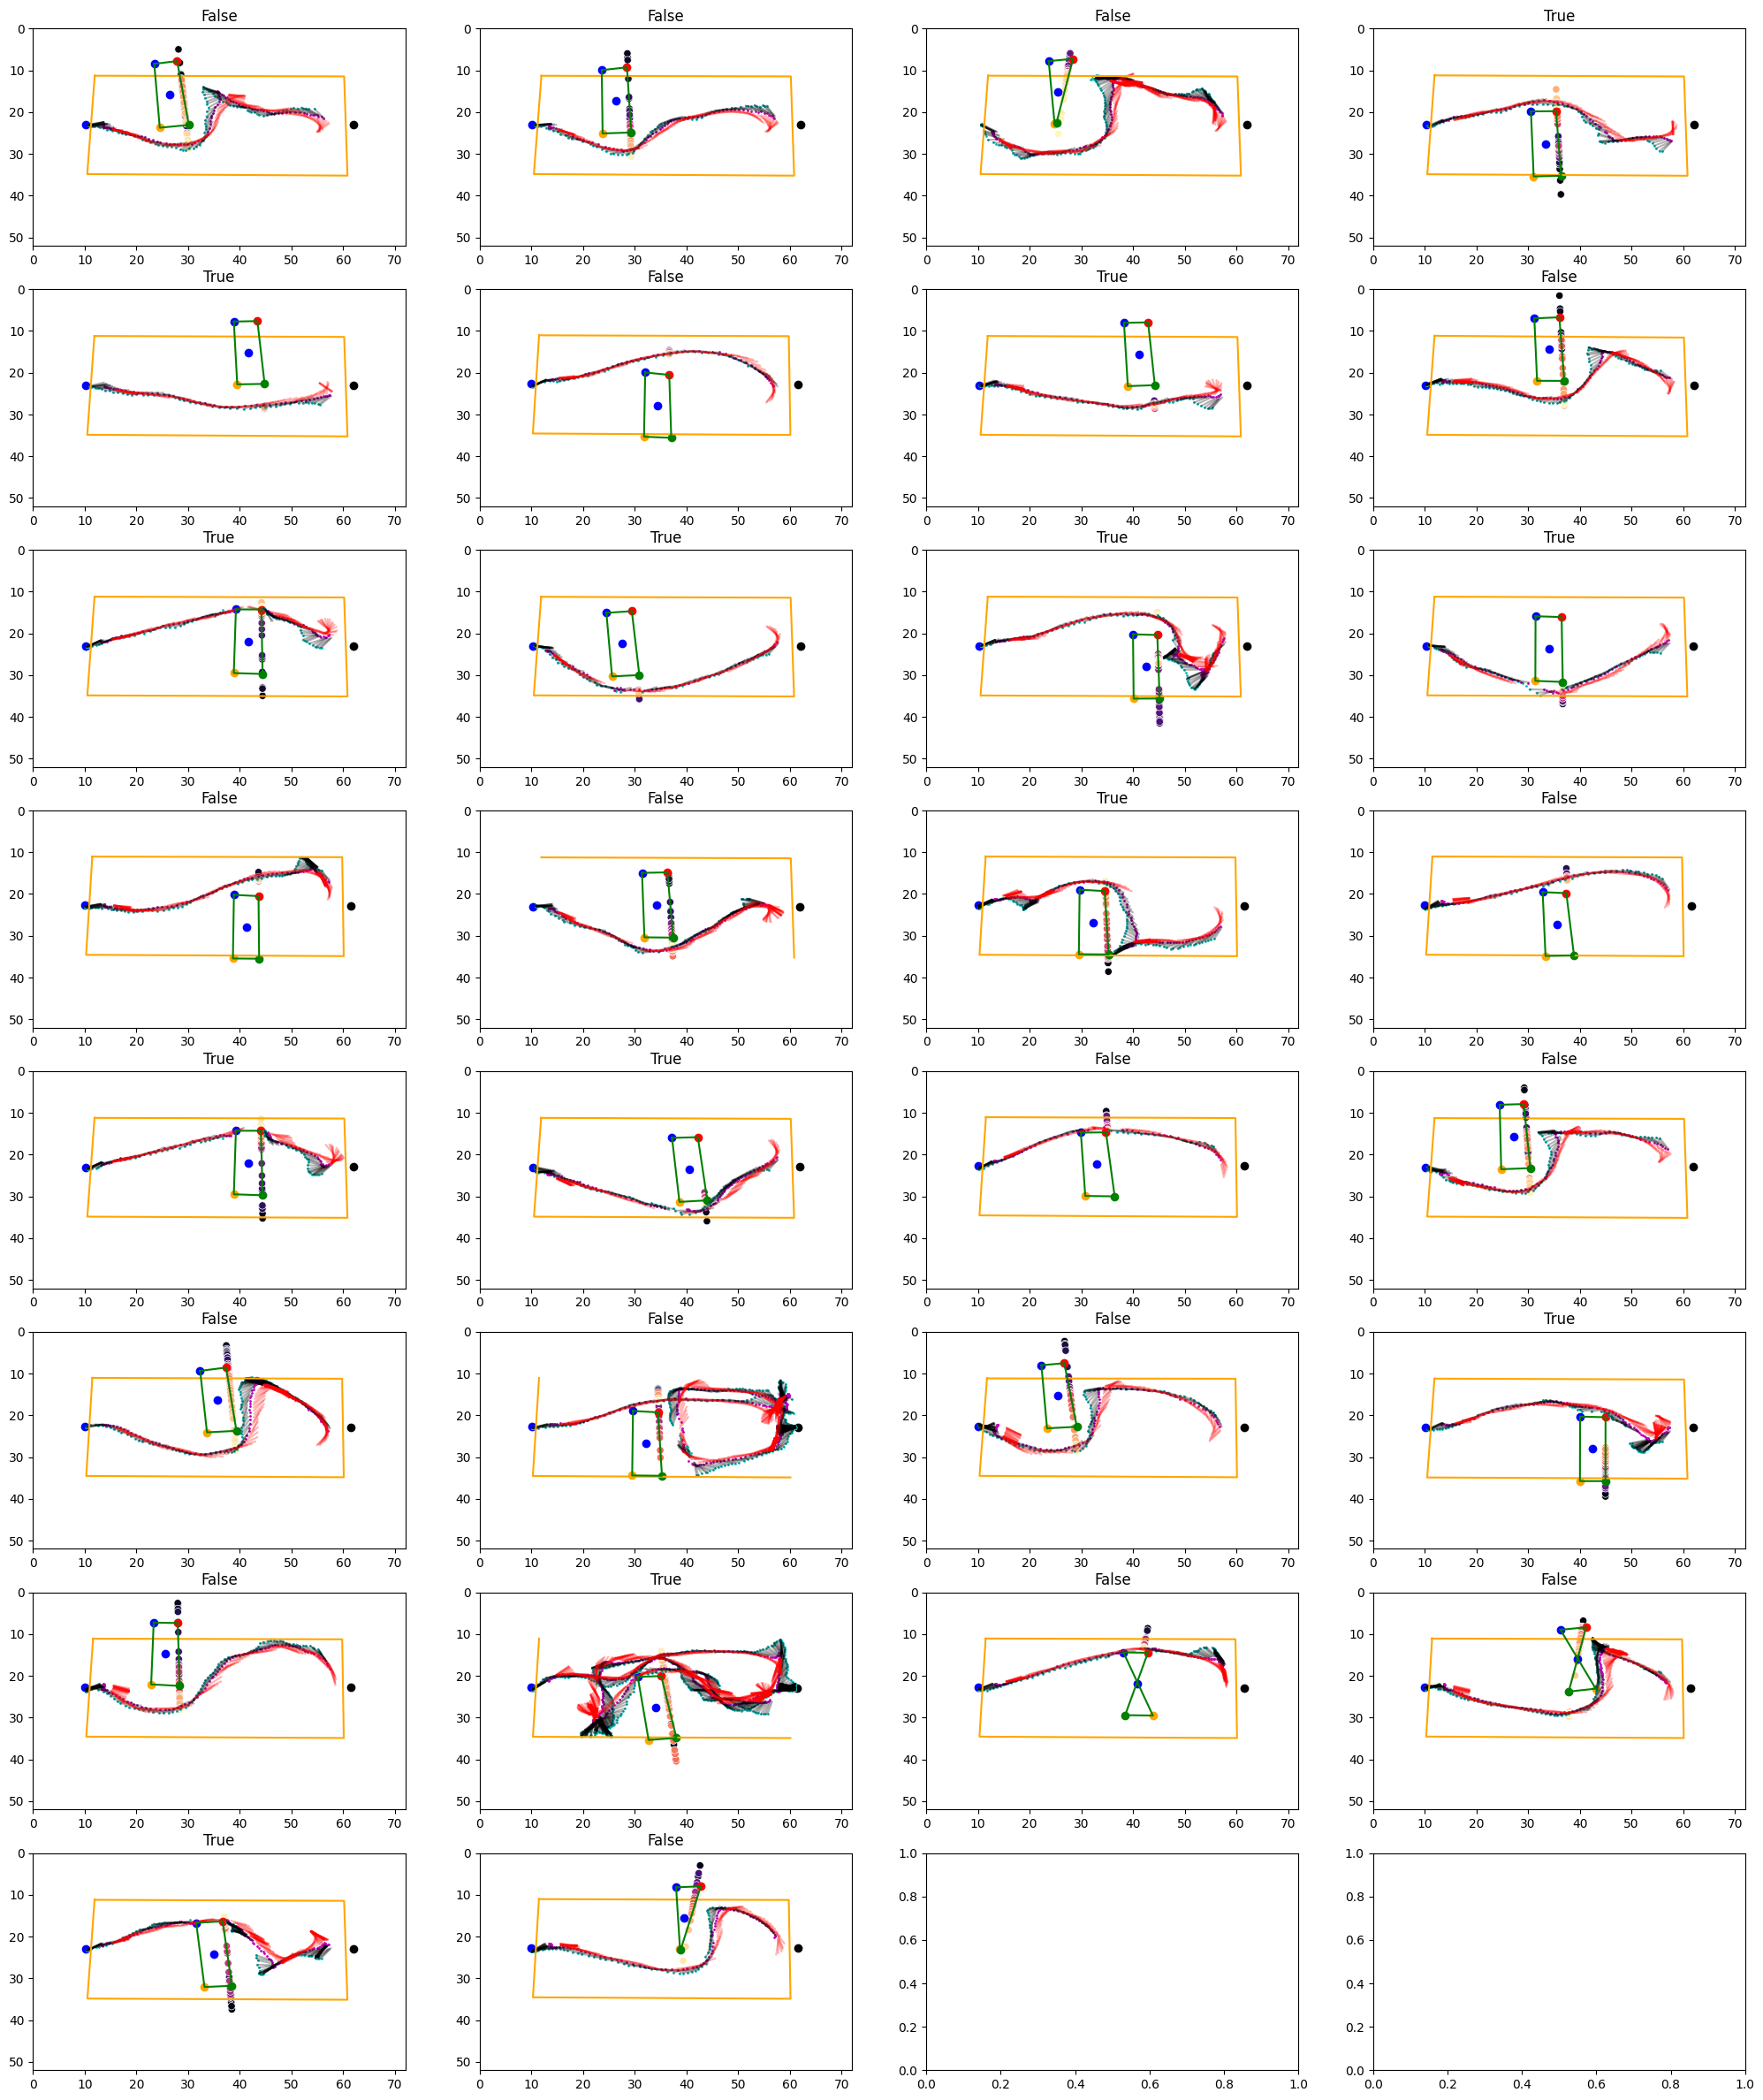

In [95]:
y = nearestX_roundup(len(test),4)
fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(test)),dpi = 100)
for ind,row in test.iterrows():
    plt.subplot(int((y/4)),4,ind+1)
    plt.gca().set_title(str(row['facing_angle']))
    for indx,i in enumerate(row['head_angle']):
                    current_ang = i
                    x1 = row['ts_nose_x_cm'][indx]
                    y1 = row['ts_nose_y_cm'][indx]
                    x2 = x1-3 * np.cos(current_ang)
                    y2 = y1-3* np.sin(current_ang)
                    plt.plot((x1,x2), (y1,y2), '-',color = 'black',alpha=0.3)
    for indx,i in enumerate(row['body_angle']):
            current_ang = i
            x1 = row['ts_midspine_x_cm'][indx]
            y1 = row['ts_midspine_y_cm'][indx]
            x2 = x1-3 * np.cos(current_ang)
            y2 = y1-3* np.sin(current_ang)
            plt.plot((x1,x2), (y1,y2), '-',color = 'red',alpha=0.3)
    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = enumerate(row['obstacle_intersect_nose_x']), palette ='magma',legend=False)    
    plt.scatter(row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm'],color = 'blue')
    plt.scatter(row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'],color = 'red')
    plt.scatter(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm'],color = 'orange')
    plt.scatter(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'],color = 'green')
    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
    plt.scatter(row['ts_nose_x_cm'],row['ts_nose_y_cm'], color = 'c',s=1)
    plt.scatter(row['ts_spine_x_cm'],row['ts_spine_y_cm'], color = 'm',s=1)
    plt.ylim([52,0]); plt.xlim([0, 72])
    


In [17]:
df['animal'].unique()

array(['J19LT', 'J19RT', 'J20LT', 'J20RT'], dtype=object)

In [84]:
J20RT = df[df['animal']=='J20RT']

In [21]:
J20RT['facing_angle']

245     False
246      True
247     False
248      True
249     False
        ...  
1226     True
1227    False
1228     True
1229    False
1230    False
Name: facing_angle, Length: 239, dtype: object

In [66]:
J20RT

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,all_obstacle_intersect_nose_y,obstacle_intersect_nose_x,obstacle_intersect_nose_y,normalized_counts_intersect_nose_y,sum_normalized_counts_intersect_nose_y,bins_intersect_nose_y,mean_normalized_counts_intersect_nose_y,facing_angle,interp_ts_nose_x_cm,interp_ts_nose_y_cm
245,56396.382105,56401.703283,"[56396.387507, 56396.404108, 56396.420454, 563...","[264, 265, 266, 267, 268, 269, 270, 271, 272, ...","[112.0492172241211, 111.85668182373047, 111.71...","[263.0643615722656, 262.69403076171875, 262.92...","[0.9999997615814209, 0.9999996423721313, 0.999...","[123.26714324951172, 122.17658996582031, 122.3...","[273.4779052734375, 273.4393615722656, 273.583...","[0.9999998807907104, 0.9999997615814209, 0.999...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[34.65730438269459, 34.604389561204584, 34.593...","[14.09143771475114, 17.580916801380493, 18.300...","[0, 0.047619047619047616, 0.9523809523809528, ...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.0412907772511108, 0.1518709321352525, 0.276...",False,"[9.910433267647432, 13.35700569754294, 16.8412...","[13.96354652692109, 18.455928574413733, 22.831..."
246,56401.703283,56405.103193,"[56401.705612, 56401.722419, 56401.73966, 5640...","[[583, 584, 585, 586, 587, 588, 589, 590, 591,...","[567.846923828125, 567.9541015625, 567.9830932...","[261.62213134765625, 261.7710266113281, 261.85...","[0.9999982118606567, 0.9999979734420776, 0.999...","[559.8572998046875, 560.25341796875, 560.58520...","[249.90591430664062, 250.23562622070312, 250.2...","[0.9999986886978149, 0.9999984502792358, 0.999...",...,"[0.0, 0.0, 0.0, 36.575057946054, 35.0613403014...","[39.17196476610385, 39.187250967966506, 39.193...","[36.575057946054, 35.061340301420366, 34.46040...","[0, 0, 0, 0, 0, 0, 0, 0.18181818181818182, 0.8...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.0023809523809523807, 0.02353328781900211, 0...",True,"[33.51360294155784, 44.641147076577255, 55.718...","[16.883287458354275, 22.488754847926273, 28.08..."
247,56405.103193,56415.839680,"[56405.106944, 56405.123494, 56405.141068, 564...","[787, 788, 789, 790, 791, 792, 793, 794, 795, ...","[112.341796875, 112.5261459350586, 112.2376403...","[262.132080078125, 261.9194030761719, 262.1935...","[0.9999998807907104, 0.9999998807907104, 0.999...","[124.35699462890625, 124.48033905029297, 124.6...","[271.0626525878906, 270.6658020019531, 271.431...","[0.9999998807907104, 0.9999998807907104, 0.999...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25.566215492398214, 25.57275307954447, 25.586...","[14.22569768356614, 15.37019164071948, 17.7050...","[0.02197802197802198, 0.06593406593406594, 0.3...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.030321349536689718, 0.08265405522305395, 0....",False,"[10.45526691482189, 14.107718744309224, 17.780...","[14.277329859224785, 19.07794111246258, 23.989..."
248,56415.839680,56420.066956,"[56415.843865, 56415.861337, 56415.877235, 564...","[[1431, 1432, 1433, 1434, 1435, 1436, 1437, 14...","[569.6924438476562, 570.3181762695312, 570.292...","[260.84686279296875, 260.5827941894531, 260.42...","[0.9999996423721313, 0.9999996423721313, 0.999...","[554.6183471679688, 554.9428100585938, 555.338...","[254.00350952148438, 254.08241271972656, 254.0...","[0.9999994039535522, 0.9999994039535522, 0.999...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[30.392652729768674, 30.39295684765123, 30.376...","[37.02545389936552, 37.04984808648651, 35.7554...","[0, 0, 0, 0, 0, 0, 0, 0, 0.9444444444444448, 0...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.007798080472499077, 0.01977010392708067, 0....",True,"[33.41512869870375, 44.5201336323083, 55.59015...","[18.91859817036586, 25.29546506235097, 31.7248..."
249,56420.066956,56430.414502,"[56420.078784, 56420.095475, 56420.112051, 564...","[1685, 1686, 1

In [47]:
J20RT.loc[J20RT.index.tolist(),'first_poke']

245     56396.382105
246     56401.703283
247     56405.103193
248     56415.839680
249     56420.066956
            ...     
1226    55875.372928
1227    55878.572134
1228    55931.747148
1229    55936.359296
1230    55941.741926
Name: first_poke, Length: 239, dtype: float64

In [73]:
def get_mean(df_used,df_target,column):
    empty = np.zeros([len(df),100])
    count =  0
    for ind, row in df_used.iterrows():
        values = row[column]
        empty[count,0:] = row[column]
        count += 1
    median_trace = np.nanmean(empty, axis=0)
    df_target.loc[df_used.index.tolist(),'mean_' + column] = median_trace[0,:].astype(object)
       

In [82]:
def interp_trace(df,interplength,columnx,columny):
    fake_time = np.linspace(0,1,interplength)
    box_sz = 5 
    box = np.ones(box_sz)/box_sz
    count = 0 
    for ind,row in df.iterrows():
        xT = np.linspace(0,1,len(row[columnx])); yT = np.linspace(0,1,len(row[columny]))
        intx = interp1d(xT, row[columnx], bounds_error=False,fill_value= 'extrapolate')(fake_time).astype(object)
        inty = interp1d(yT, row[columny], bounds_error=False,fill_value= 'extrapolate')(fake_time).astype(object)
        fillx = pd.Series(intx).fillna(method='bfill').to_numpy()
        filly = pd.Series(inty).fillna(method='bfill').to_numpy()
        #smoothx = np.convolve(signal.medfilt(fillx,kernel_size=3), box, mode='same')
        #smoothy = np.convolve(signal.medfilt(filly,kernel_size=3), box, mode='same')
        count += 1
        df.at[ind,'interp_' + columnx ] = fillx.astype(object)
        df.at[ind,'interp_' + columny ] = filly.astype(object)




In [83]:
interp_trace(df,100,'ts_nose_x_cm','ts_nose_y_cm')

In [111]:
## get mean trace by facing 
by_cluster =J20RT.groupby(['cluster_label'])
for cluster,cluster_frame in by_cluster:
    by_direction = cluster_frame.groupby(['odd'])
    for direction,direction_frame in by_direction:
        by_facing = direction_frame.groupby(['facing_angle'])
        for facing, facing_frame in by_facing:
            get_mean(facing_frame,J20RT,'interp_ts_nose_x_cm')
            get_mean(facing_frame,J20RT,'interp_ts_nose_y_cm')
            
        

In [108]:
facing_frame

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,obstacle_intersect_nose_y,normalized_counts_intersect_nose_y,sum_normalized_counts_intersect_nose_y,bins_intersect_nose_y,mean_normalized_counts_intersect_nose_y,facing_angle,interp_ts_nose_x_cm,interp_ts_nose_y_cm,mean_interp_ts_nose_x_cm,mean_interp_ts_nose_y_cm
263,56492.969830,56496.312396,"[56492.97047, 56492.987404, 56493.004224, 5649...","[6057, 6058, 6059, 6060, 6061, 6062, 6063, 606...","[112.62930297851562, 112.4708023071289, 112.64...","[266.3126525878906, 266.15673828125, 266.68841...","[0.9999996423721313, 0.9999995231628418, 0.999...","[129.6827392578125, 129.69178771972656, 129.89...","[267.38446044921875, 266.87054443359375, 267.3...","[0.9999998807907104, 0.9999998807907104, 0.999...",...,"[41.586930018750394, 35.18435741365019, 30.413...","[0.19999999999999998, 0.4666666666666667, 0.13...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.1151790133641313, 0.5863357453194113, 0.146...",True,"[16.257832655384597, 16.953980604699634, 17.43...","[30.639905915638522, 30.58629405477704, 30.495...","[16.431541928001696, 17.00915102560903, 17.405...","[30.049730191992722, 29.955944656911427, 29.88..."
1158,55611.170713,55614.095641,"[55611.183001, 55611.199961, 55611.217036, 556...","[1447, 1448, 1449, 1450, 1451, 1452, 1453, 145...","[113.73174285888672, 113.47737884521484, 113.4...","[268.7843017578125, 269.6869812011719, 270.808...","[0.9999994039535522, 0.9999996423721313, 0.999...","[131.68846130371094, 130.99842834472656, 131.1...","[263.14434814453125, 264.4523620605469, 264.67...","[0.9999998807907104, 0.9999998807907104, 0.999...",...,"[41.87801100861783, 35.667922119044235, 30.082...","[0.02631578947368421, 0.39473684210526305, 0.1...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.1151790133641313, 0.5863357453194113, 0.146...",True,"[16.605251200618795, 17.064321446518424, 17.38...","[29.459554468346923, 29.32559525904582, 29.274...","[16.431541928001696, 17.00915102560903, 17.405...","[30.049730191992722, 29.955944656911427, 29.88..."


(0.0, 72.0)

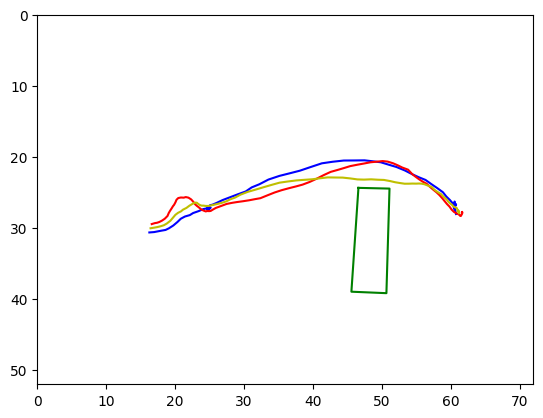

In [109]:
plt.plot(facing_frame.at[263,'interp_ts_nose_x_cm'],facing_frame.at[263,'interp_ts_nose_y_cm'],c ='b')
plt.plot(facing_frame.at[1158,'interp_ts_nose_x_cm'],facing_frame.at[1158,'interp_ts_nose_y_cm'],c = 'r')
plt.plot(facing_frame.at[263,'mean_interp_ts_nose_x_cm'],facing_frame.at[263,'mean_interp_ts_nose_y_cm'],c ='y')

plt.plot([facing_frame.at[263,'gt_obstacleTL_x_cm'], facing_frame.at[263,'gt_obstacleTR_x_cm'], facing_frame.at[263,'gt_obstacleBR_x_cm'], facing_frame.at[263,'gt_obstacleBL_x_cm'],facing_frame.at[263,'gt_obstacleTL_x_cm']],
            [facing_frame.at[263,'gt_obstacleTL_y_cm'], facing_frame.at[263,'gt_obstacleTR_y_cm'], facing_frame.at[263,'gt_obstacleBR_y_cm'], facing_frame.at[263,'gt_obstacleBL_y_cm'],facing_frame.at[263,'gt_obstacleTL_y_cm']],color='green')

plt.ylim([52,0]); plt.xlim([0, 72])

In [107]:
get_mean(facing_frame,facing_frame,'interp_ts_nose_x_cm')
get_mean(facing_frame,facing_frame,'interp_ts_nose_y_cm')


[16.43154193 17.00915103 17.40584265 17.88124476 18.35820306 18.79182209
 19.31380843 19.697384   20.0381465  20.42222628 20.84815791 21.14316367
 21.64011846 22.07896036 22.51588647 22.77980427 23.00251467 23.17787314
 23.23353548 23.36805016 23.52142875 23.65496236 23.86263874 24.12036793
 24.4203157  24.87204115 25.43366473 26.07966399 26.74930755 27.46253716
 28.02285441 28.69800948 29.49148739 30.5252342  31.69341172 32.78512581
 33.96311325 35.15768396 36.3501958  37.60668705 38.87003033 39.93594393
 41.05221535 42.15123651 43.26641255 44.32268446 45.44752056 46.4574718
 47.4232836  48.44574037 49.4224384  50.31096972 51.22389873 51.94832513
 52.64326995 53.32824388 53.92345245 54.44438455 54.96655947 55.41379438
 55.77747031 56.17392793 56.52528156 56.83580579 57.26049684 57.57863448
 57.80486698 58.06513947 58.37967365 58.57492805 58.76462527 59.05669753
 59.2662896  59.47532993 59.63691768 59.82656869 60.03556884 60.21770204
 60.3493191  60.52068189 60.71795376 60.88346138 60.

In [110]:
def get_mean(df_used,df_target,column):
    empty = np.zeros([len(df_used),1,100])
    count =  0
    for ind, row in df_used.iterrows():
        values = row[column]
        empty[count,0:] = row[column]
        count += 1
    mean_trace = np.nanmean(empty, axis=0)
    for ind in df_used.index.tolist():
        df_target.at[ind,'mean_' + column] = mean_trace[0,:].astype(object)

In [ ]:
empty = np.zeros([len(df),1,100])
count =  0
for ind, row in df_used.iterrows():
    values = row[column]
    empty[count,0:] = row[column]
    count += 1
median_trace = np.nanmean(empty, axis=0)
df_target.loc[df_used.index.tolist(),'mean_' + column] = median_trace[0,:].astype(object)

In [76]:
empty = np.zeros([len(df),100])
empty

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
J20RT

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,obstacle_intersect_nose_y,normalized_counts_intersect_nose_y,sum_normalized_counts_intersect_nose_y,bins_intersect_nose_y,mean_normalized_counts_intersect_nose_y,facing_angle,interp_ts_nose_x_cm,interp_ts_nose_y_cm,mean_interp_ts_nose_x_cm,mean_interp_ts_nose_y_cm
245,56396.382105,56401.703283,"[56396.387507, 56396.404108, 56396.420454, 563...","[264, 265, 266, 267, 268, 269, 270, 271, 272, ...","[112.0492172241211, 111.85668182373047, 111.71...","[263.0643615722656, 262.69403076171875, 262.92...","[0.9999997615814209, 0.9999996423721313, 0.999...","[123.26714324951172, 122.17658996582031, 122.3...","[273.4779052734375, 273.4393615722656, 273.583...","[0.9999998807907104, 0.9999997615814209, 0.999...",...,"[14.09143771475114, 17.580916801380493, 18.300...","[0, 0.047619047619047616, 0.9523809523809528, ...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.0412907772511108, 0.1518709321352525, 0.276...",False,"[16.132638080191107, 16.511459108852236, 16.90...","[23.565557072912735, 23.344467484793448, 23.12...","[16.198296915737906, 16.627483229220413, 16.89...","[25.442294204335187, 25.197527180928667, 24.98..."
246,56401.703283,56405.103193,"[56401.705612, 56401.722419, 56401.73966, 5640...","[[583, 584, 585, 586, 587, 588, 589, 590, 591,...","[567.846923828125, 567.9541015625, 567.9830932...","[261.62213134765625, 261.7710266113281, 261.85...","[0.9999982118606567, 0.9999979734420776, 0.999...","[559.8572998046875, 560.25341796875, 560.58520...","[249.90591430664062, 250.23562622070312, 250.2...","[0.9999986886978149, 0.9999984502792358, 0.999...",...,"[36.575057946054, 35.061340301420366, 34.46040...","[0, 0, 0, 0, 0, 0, 0, 0.18181818181818182, 0.8...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.0023809523809523807, 0.02353328781900211, 0...",True,"[55.901839087329726, 55.88402530534814, 55.799...","[28.325503048454205, 28.167545252336808, 28.08...","[55.7767343126436, 55.37882788511695, 54.99541...","[26.832723001629986, 26.72441531874639, 26.623..."
247,56405.103193,56415.839680,"[56405.106944, 56405.123494, 56405.141068, 564...","[787, 788, 789, 790, 791, 792, 793, 794, 795, ...","[112.341796875, 112.5261459350586, 112.2376403...","[262.132080078125, 261.9194030761719, 262.1935...","[0.9999998807907104, 0.9999998807907104, 0.999...","[124.35699462890625, 124.48033905029297, 124.6...","[271.0626525878906, 270.6658020019531, 271.431...","[0.9999998807907104, 0.9999998807907104, 0.999...",...,"[14.22569768356614, 15.37019164071948, 17.7050...","[0.02197802197802198, 0.06593406593406594, 0.3...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.030321349536689718, 0.08265405522305395, 0....",False,"[16.309510183918775, 17.70456524275399, 18.262...","[24.919011320455443, 23.79554976537464, 23.033...","[16.200759956059944, 16.829995608243767, 17.26...","[25.012141875035635, 24.54230338232988, 24.191..."
248,56415.839680,56420.066956,"[56415.843865, 56415.861337, 56415.877235, 564...","[[1431, 1432, 1433, 1434, 1435, 1436, 1437, 14...","[569.6924438476562, 570.3181762695312, 570.292...","[260.84686279296875, 260.5827941894531, 260.42...","[0.9999996423721313, 0.9999996423721313, 0.999...","[554.6183471679688, 554.9428100585938, 555.338...","[254.00350952148438, 254.08241271972656, 254.0...","[0.9999994039535522, 0.9999994039535522, 0.999...",...,"[37.02545389936552, 37.04984808648651, 35.7554...","[0, 0, 0, 0, 0, 0, 0, 0, 0.9444444444444448, 0...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.007798080472499077, 0.01977010392708067, 0....",True,"[55.88624153626936, 55.73837983709519, 55.5988...","[31.26828357776337, 31.596717398923804, 31.727...","[55.79792543353822, 55.330424297410964, 54.904...","[32.16786406879464, 32.02513266382128, 31.8707..."
249,56420.066956,56430.414502,"[56420.078784, 56420.095475, 56420.112051, 564...","[1685, 1686, 1687, 1

In [195]:
clrs = ['r','g','b','k']
keylist = ['area_TL','leftportT']
key = 'mean_{}_x_cm'.format(keylist)
'{}/{}'.format(date,ani)

'1.0'

ValueError: num must be 1 <= num <= 9, not 4.0

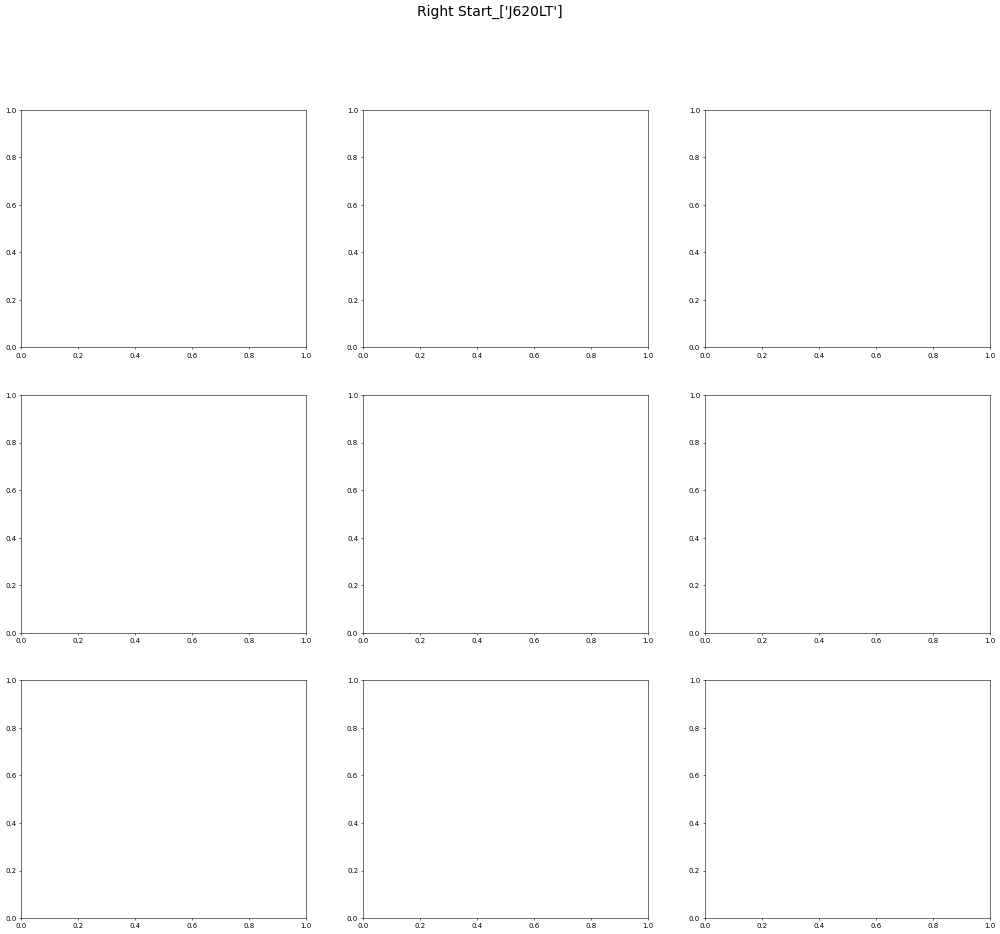

In [20]:
## plot raw traces and mean trace based on facing angle
by_direction = df.groupby(['odd'])
for direction,direction_frame in by_direction:
    fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
    if direction == False:
        fig.suptitle('Right Start'+'_'+str(df['animal'].unique()), size = 20) 
        right_by_cluster = direction_frame.groupby(['cluster_label'])
        for cluster,cluster_frame in right_by_cluster:
            plt.subplot(3,3,cluster+1)
            plt.gca().set_title(str(cluster+1))
            plt.plot([cluster_frame['mean_arenaTL_x_cm'].unique(), cluster_frame['mean_arenaTR_x_cm'].unique(), cluster_frame['mean_arenaBR_x_cm'].unique(), cluster_frame['mean_arenaBL_x_cm'].unique(),cluster_frame['mean_arenaTL_x_cm'].unique()],
                        [cluster_frame['mean_arenaTL_y_cm'].unique(), cluster_frame['mean_arenaTR_y_cm'].unique(), cluster_frame['mean_arenaBR_y_cm'].unique(), cluster_frame['mean_arenaBL_y_cm'].unique(),cluster_frame['mean_arenaTL_y_cm'].unique()],color='red')
            plt.scatter(cluster_frame['mean_leftportT_x_cm'].unique(),cluster_frame['mean_leftportT_y_cm'].unique(),color='blue')
            plt.scatter(cluster_frame['mean_rightportT_x_cm'].unique(),cluster_frame['mean_rightportT_y_cm'].unique(),color='black')
            for ind,row in cluster_frame.iterrows():
                plt.subplot(3,3,cluster+1)
                #plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                        #[row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')
                plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                        [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
                plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                #plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                #plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')

                
                    #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                plt.ylim([52,0]); plt.xlim([0, 72])
                if row['facing_angle'] == True: 
                    plt.plot(row['mean_interp_ts_nose_x_cm'],row['mean_interp_ts_nose_y_cm'],'*',c = 'red')
                    plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'], c ='b') 
                if row['facing_angle'] == False:
                    plt.plot(row['mean_interp_ts_nose_x_cm'],row['mean_interp_ts_nose_y_cm'],'*',c = 'grey')
                    plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = 'r') 
    if direction == True:
        fig.suptitle('Left Start'+'_'+str(df['animal'].unique()), size = 20) 
        left_by_cluster = direction_frame.groupby(['cluster_label'])
        for cluster,cluster_frame in left_by_cluster:
            plt.subplot(3,3,cluster+1)
            plt.gca().set_title(str(cluster))
            plt.plot([cluster_frame['mean_arenaTL_x_cm'].unique(), cluster_frame['mean_arenaTR_x_cm'].unique(), cluster_frame['mean_arenaBR_x_cm'].unique(), cluster_frame['mean_arenaBL_x_cm'].unique(),cluster_frame['mean_arenaTL_x_cm'].unique()],
                        [cluster_frame['mean_arenaTL_y_cm'].unique(), cluster_frame['mean_arenaTR_y_cm'].unique(), cluster_frame['mean_arenaBR_y_cm'].unique(), cluster_frame['mean_arenaBL_y_cm'].unique(),cluster_frame['mean_arenaTL_y_cm'].unique()],color='red')
            plt.scatter(cluster_frame['mean_leftportT_x_cm'].unique(),cluster_frame['mean_leftportT_y_cm'].unique(),color='blue')
            plt.scatter(cluster_frame['mean_rightportT_x_cm'].unique(),cluster_frame['mean_rightportT_y_cm'].unique(),color='black')
            for ind,row in cluster_frame.iterrows():
                plt.subplot(3,3,cluster+1)
                #plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                        #[row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')
                plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                        [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
                plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                #plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                #plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                #plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm']) 
                
                    #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                plt.ylim([52,0]); plt.xlim([0, 72])
                if row['facing_angle'] == True: 
                    plt.plot(row['mean_interp_ts_nose_x_cm'],row['mean_interp_ts_nose_y_cm'],'*',c = 'red')
                    plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'], c ='b') 
                if row['facing_angle'] == False:
                    plt.plot(row['mean_interp_ts_nose_x_cm'],row['mean_interp_ts_nose_y_cm'],'*',c = 'grey')
                    plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = 'r') 



    
                

 

In [190]:
df['ts_nose_x_cm'].iloc[]

0     [16.67372425465531, 17.34926158908538, 17.9952...
1     [55.74014379940179, 55.50069872458062, 55.4210...
10    [55.62237026334993, 54.98054616459371, 54.5215...
Name: ts_nose_x_cm, dtype: object

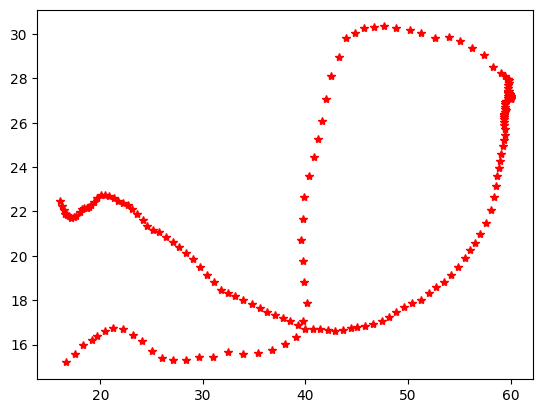

In [179]:
xinds = np.array([np.nanargmin(np.abs(df['ts_nose_x_cm'].iloc[n]-df['gt_obstacle_cen_x_cm'].iloc[n])) for n in range(len(df['ts_nose_x_cm']))])
yvals  = np.array([df['ts_nose_y_cm'].iloc[m][xinds[m]] for m in range(len(xinds))])
bottom = yvals<df['gt_obstacle_cen_y_cm'] #  True == right, False==Left
trial = 0
plt.plot(np.stack(df['interp_ts_nose_x_cm'][bottom])[trial],np.stack(df['interp_ts_nose_y_cm'][bottom])[trial],'*',c = 'red')
plt.plot(np.stack(df['interp_ts_nose_x_cm'][~bottom])[trial],np.stack(df['interp_ts_nose_y_cm'][~bottom])[trial],'*',c = 'red')
plt.show()

In [1]:
df

NameError: name 'df' is not defined

In [171]:
np.stack(df['interp_ts_nose_y_cm'][yvals<df['gt_obstacle_cen_y_cm']]

array([[22.471035207369436, 22.25184824215709, 22.060194240060163, ...,
        26.83361958032636, 26.911333759113504, 26.96242389029959],
       [31.66960196461883, 31.610430254873787, 31.70308575744932, ...,
        26.987294736834592, 27.02412209408067, 27.07587307958678],
       [32.983315431446194, 33.159379106419856, 33.26489208599445, ...,
        27.866748799281496, 27.834025736081557, 27.78638665386067],
       ...,
       [25.527922595359758, 25.470209506947764, 25.200131595300366, ...,
        27.719222814791436, 27.738899471369493, 27.731691511786533],
       [26.765485949766973, 26.846725119505752, 26.853287698435178, ...,
        27.586003517306818, 27.699074899902598, 27.771879733756748],
       [34.65284451128238, 34.84518724489917, 35.00198892315714, ...,
        28.70103688262847, 28.66213802446132, 28.597431460055386]],
      dtype=object)

In [ ]:
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_direction = animal_frame.groupby(['odd'])
    for direction,direction_frame in by_direction:
        fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
        if direction == False:
            fig.suptitle('Right Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            right_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in right_by_cluster:
                plt.subplot(3,3,cluster+1)
                plt.gca().set_title(str(cluster))
                plt.plot([cluster_frame['mean_arenaTL_x_cm'].unique(), cluster_frame['mean_arenaTR_x_cm'].unique(), cluster_frame['mean_arenaBR_x_cm'].unique(), cluster_frame['mean_arenaBL_x_cm'].unique(),cluster_frame['mean_arenaTL_x_cm'].unique()],
                            [cluster_frame['mean_arenaTL_y_cm'].unique(), cluster_frame['mean_arenaTR_y_cm'].unique(), cluster_frame['mean_arenaBR_y_cm'].unique(), cluster_frame['mean_arenaBL_y_cm'].unique(),cluster_frame['mean_arenaTL_y_cm'].unique()],color='red')
                plt.scatter(cluster_frame['mean_leftportT_x_cm'].unique(),cluster_frame['mean_leftportT_y_cm'].unique(),color='blue')
                plt.scatter(cluster_frame['mean_rightportT_x_cm'].unique(),cluster_frame['mean_rightportT_y_cm'].unique(),color='black')
                for ind,row in cluster_frame.iterrows():
                    plt.subplot(3,3,cluster+1)
                    #plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                            #[row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')


                    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')




                    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                    #plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                    #plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                    sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
                        #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                    plt.ylim([52,0]); plt.xlim([0, 72])
            pdf.savefig(); plt.close()
               

        if direction ==True:
            fig.suptitle('Left Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            left_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in left_by_cluster:
                plt.subplot(3,3,cluster+1)
                plt.gca().set_title(str(cluster))
                plt.plot([cluster_frame['mean_arenaTL_x_cm'].unique(), cluster_frame['mean_arenaTR_x_cm'].unique(), cluster_frame['mean_arenaBR_x_cm'].unique(), cluster_frame['mean_arenaBL_x_cm'].unique(),cluster_frame['mean_arenaTL_x_cm'].unique()],
                            [cluster_frame['mean_arenaTL_y_cm'].unique(), cluster_frame['mean_arenaTR_y_cm'].unique(), cluster_frame['mean_arenaBR_y_cm'].unique(), cluster_frame['mean_arenaBL_y_cm'].unique(),cluster_frame['mean_arenaTL_y_cm'].unique()],color='red')
                plt.scatter(cluster_frame['mean_leftportT_x_cm'].unique(),cluster_frame['mean_leftportT_y_cm'].unique(),color='blue')
                plt.scatter(cluster_frame['mean_rightportT_x_cm'].unique(),cluster_frame['mean_rightportT_y_cm'].unique(),color='black')
                for ind,row in cluster_frame.iterrows():
                    plt.subplot(3,3,cluster+1)
                    #plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                            #[row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='red')


                    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')




                    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                    #plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                   # plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                    sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
                        #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
                    plt.ylim([52,0]); plt.xlim([0, 72])
           

In [ ]:
test = df.sample(1)
plt.plot(test['head_angle'].to_numpy()[0])

In [ ]:
#test = df.sample(1)
plt.gca().set_title(str(test['odd']))
for indx,i in enumerate(test['head_angle'].to_numpy()[0]):
    current_ang = i
    x1 = test['ts_nose_x_cm'].to_numpy()[0][indx]
    y1 = test['ts_nose_y_cm'].to_numpy()[0][indx]
    x2 = x1-3 * np.cos(current_ang)
    y2 = y1-3* np.sin(current_ang)
    plt.plot((x1,x2), (y1,y2), '-',color = 'black',alpha=0.3)
for indx,i in enumerate(test['body_angle'].to_numpy()[0]):
        current_ang = i
        x1 = test['ts_midspine_x_cm'].to_numpy()[0][indx]
        y1 = test['ts_midspine_y_cm'].to_numpy()[0][indx]
        x2 = x1-3 * np.cos(current_ang)
        y2 = y1-3* np.sin(current_ang)
        plt.plot((x1,x2), (y1,y2), '-',color = 'red',alpha=0.3)
plt.plot([test['arenaTL_x_cm'], test['arenaTR_x_cm'], test['arenaBR_x_cm'], test['arenaBL_x_cm'],test['arenaTL_x_cm']],
            [test['arenaTL_y_cm'], test['arenaTR_y_cm'], test['arenaBR_y_cm'], test['arenaBL_y_cm'],test['arenaTL_y_cm']],color='orange')
plt.plot([test['gt_obstacleTL_x_cm'], test['gt_obstacleTR_x_cm'], test['gt_obstacleBR_x_cm'], test['gt_obstacleBL_x_cm'],test['gt_obstacleTL_x_cm']],
        [test['gt_obstacleTL_y_cm'], test['gt_obstacleTR_y_cm'], test['gt_obstacleBR_y_cm'], test['gt_obstacleBL_y_cm'],test['gt_obstacleTL_y_cm']],color='green')
sns.scatterplot(x=test['obstacle_intersect_nose_x'].to_numpy()[0],y=test['obstacle_intersect_nose_y'].to_numpy()[0],hue = enumerate(test['obstacle_intersect_nose_x'].to_numpy()[0]), palette ='magma',legend=False)    
plt.scatter(test['gt_obstacleTL_x_cm'].to_numpy()[0],test['gt_obstacleTL_y_cm'].to_numpy()[0],color = 'blue')
plt.scatter(test['gt_obstacleTR_x_cm'].to_numpy()[0],test['gt_obstacleTR_y_cm'].to_numpy()[0],color = 'red')
plt.scatter(test['gt_obstacleBL_x_cm'].to_numpy()[0],test['gt_obstacleBL_y_cm'].to_numpy()[0],color = 'orange')
plt.scatter(test['gt_obstacleBR_x_cm'],test['gt_obstacleBR_y_cm'],color = 'green')
plt.scatter(test['gt_obstacle_cen_x_cm'].to_numpy()[0],test['gt_obstacle_cen_y_cm'].to_numpy()[0],color='blue')
plt.scatter(test['leftportT_x_cm'].to_numpy()[0],test['leftportT_y_cm'].to_numpy()[0],color='blue')
plt.scatter(test['rightportT_x_cm'].to_numpy()[0],test['rightportT_y_cm'].to_numpy()[0],color='black')
plt.scatter(test['ts_nose_x_cm'].to_numpy()[0],test['ts_nose_y_cm'].to_numpy()[0], color = 'c',s=1)
plt.scatter(test['ts_spine_x_cm'].to_numpy()[0],test['ts_spine_y_cm'].to_numpy()[0], color = 'm',s=1)
plt.ylim([52,0]); plt.xlim([0, 72])


In [ ]:
plt.plot(test['head_angle'].to_numpy()[0])

In [ ]:
plt.hist(test['head_angle'])

In [ ]:
df1

In [ ]:
#df1.loc[246,'obstacle_intersect_nose_y']-
plt.hist(((df1.loc[246,'obstacle_intersect_nose_y'] -  df1.loc[246,'obstacle_edge_mid_y_cm']))/len(df1.loc[246,'obstacle_intersect_nose_y']) )

In [ ]:
plt.plot([test['arenaTL_x_cm'], test['arenaTR_x_cm'], test['arenaBR_x_cm'], test['arenaBL_x_cm'],test['arenaTL_x_cm']],
                [test['arenaTL_y_cm'], test['arenaTR_y_cm'], test['arenaBR_y_cm'], test['arenaBL_y_cm'],test['arenaTL_y_cm']],color='orange')


plt.plot([test['gt_obstacleTL_x_cm'], test['gt_obstacleTR_x_cm'], test['gt_obstacleBR_x_cm'], test['gt_obstacleBL_x_cm'],test['gt_obstacleTL_x_cm']],
                [test['gt_obstacleTL_y_cm'], test['gt_obstacleTR_y_cm'], test['gt_obstacleBR_y_cm'], test['gt_obstacleBL_y_cm'],test['gt_obstacleTL_y_cm']],color='green')



for ind,i in enumerate(test['body_angle_tailbase']):

    current_ang = i
    x1 = test['ts_midspine_x_cm'][ind]
    y1 = test['ts_midspine_y_cm'][ind]
    x2 = x1+3 * np.cos(current_ang)
    y2 = y1+3* np.sin(current_ang)
    plt.plot((x1,x2), (y1,y2), '-',color = 'black',alpha=0.3)
    #plt.scatter(x1,y1,color = 'r',marker = '.')
    #plt.scatter(x2,y2,color = 'b',marker = '<')
    #sns.scatterplot(x=(x1,x2),y=(y1,y2),hue = enumerate(test['ts_nose_x_cm']),palette ='magma',legend=False)
for ind,i in enumerate(test['head_angle']):

    current_ang = i
    x1 = test['ts_nose_x_cm'][ind]
    y1 = test['ts_nose_y_cm'][ind]
    x2 = x1+3 * np.cos(current_ang)
    y2 = y1+3* np.sin(current_ang)
    plt.plot((x1,x2), (y1,y2), '-',color = 'red',alpha=0.3)
plt.plot([test['arenaTL_x_cm'], test['arenaTR_x_cm'], test['arenaBR_x_cm'], test['arenaBL_x_cm'],test['arenaTL_x_cm']],
                [test['arenaTL_y_cm'], test['arenaTR_y_cm'], test['arenaBR_y_cm'], test['arenaBL_y_cm'],test['arenaTL_y_cm']],color='orange')


plt.plot([test['gt_obstacleTL_x_cm'], test['gt_obstacleTR_x_cm'], test['gt_obstacleBR_x_cm'], test['gt_obstacleBL_x_cm'],test['gt_obstacleTL_x_cm']],
                [test['gt_obstacleTL_y_cm'], test['gt_obstacleTR_y_cm'], test['gt_obstacleBR_y_cm'], test['gt_obstacleBL_y_cm'],test['gt_obstacleTL_y_cm']],color='green')

#sns.scatterplot(x=test['obstacle_intersect_spine_x'],y=test['obstacle_intersect_spine_y'],hue = test['obstacle_intersect_spine_x'], palette ='magma',legend=False)    
plt.scatter(test['gt_obstacleTL_x_cm'],test['gt_obstacleTL_y_cm'],color = 'blue')
plt.scatter(test['gt_obstacleTR_x_cm'],test['gt_obstacleTR_y_cm'],color = 'red')
plt.scatter(test['gt_obstacleBL_x_cm'],test['gt_obstacleBL_y_cm'],color = 'orange')
plt.scatter(test['gt_obstacleBR_x_cm'],test['gt_obstacleBR_y_cm'],color = 'green')
plt.scatter(test['gt_obstacle_cen_x_cm'],test['gt_obstacle_cen_y_cm'],color='blue')
plt.scatter(test['leftportT_x_cm'],test['leftportT_y_cm'],color='blue')
plt.scatter(test['rightportT_x_cm'],test['rightportT_y_cm'],color='black')
plt.scatter(test['ts_spine_x_cm'],test['ts_spine_y_cm'], color = 'm',s=1)
#sns.scatterplot(x=test['ts_nose_x_cm'],y=test['ts_nose_y_cm'],hue = enumerate(test['ts_nose_x_cm']), palette ='magma',legend=False) 
plt.scatter(test['ts_nose_x_cm'][0],test['ts_nose_y_cm'][0],color='c')  
#plt.scatter(test['wobstacle_x_cm'], test['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ test['obstacle_cluster']])
plt.ylim([52,0]); plt.xlim([0, 72])

In [ ]:
points_x = np.zeros(len(test['body_angle_tailbase']))
points_y = np.zeros(len(test['body_angle_tailbase']))
obstacle_top= (test['gt_obstacleTL_x_cm'],test['gt_obstacleTL_y_cm']-6)
obstacle_bottom=(test['gt_obstacleBL_x_cm'],test['gt_obstacleBL_y_cm']+6)
for indx,i in enumerate(test['body_angle_tailbase']):
    current_ang= i
    mouse_x1 = test['ts_midspine_x_cm'][indx]
    mouse_y1 = test['ts_midspine_y_cm'][indx]
    mouse_x2 = mouse_x1-200 * np.cos(current_ang)
    mouse_y2 = mouse_y1-200* np.sin(current_ang)
    intersect_point=intersect((mouse_x1,mouse_y1),(mouse_x2,mouse_y2),obstacle_top,obstacle_bottom)
    points_x[indx] = intersect_point[0]
    points_y[indx] = intersect_point[1]
points_x_all= np.nan_to_num(points_x)
points_y_all= np.nan_to_num(points_y)
points_x = points_x_all[points_x_all!=0]
points_y = points_y_all[points_y_all!=0]
test['all_obstacle_intersect_body_x'] = points_x_all.astype(object)
test['all_obstacle_intersect_body_y'] = points_y_all.astype(object)
test['obstacle_intersect_body_x'] = points_x.astype(object)
test['obstacle_intersect_body_y'] = points_y.astype(object)


In [ ]:
plt.hist(test['nose_y_cm'])
plt.xlim([52,0])

In [ ]:

len(test['all_obstacle_intersect_nose_y'])

In [ ]:
plt.plot([test['arenaTL_x_cm'], test['arenaTR_x_cm'], test['arenaBR_x_cm'], test['arenaBL_x_cm'],test['arenaTL_x_cm']],
                [test['arenaTL_y_cm'], test['arenaTR_y_cm'], test['arenaBR_y_cm'], test['arenaBL_y_cm'],test['arenaTL_y_cm']],color='orange')


plt.plot([test['gt_obstacleTL_x_cm'], test['gt_obstacleTR_x_cm'], test['gt_obstacleBR_x_cm'], test['gt_obstacleBL_x_cm'],test['gt_obstacleTL_x_cm']],
                [test['gt_obstacleTL_y_cm'], test['gt_obstacleTR_y_cm'], test['gt_obstacleBR_y_cm'], test['gt_obstacleBL_y_cm'],test['gt_obstacleTL_y_cm']],color='green')

plt.ylim([52,0]); plt.xlim([0, 72])
sns.scatterplot(x=test['obstacle_intersect_nose_x'],y=test['obstacle_intersect_nose_y'],hue = enumerate(test['obstacle_intersect_nose_x']), palette ='magma',legend=False)

In [ ]:
df.columns.to_numpy()

In [ ]:
plt.plot([test['arenaTL_x_cm'], test['arenaTR_x_cm'], test['arenaBR_x_cm'], test['arenaBL_x_cm'],test['arenaTL_x_cm']],
                [test['arenaTL_y_cm'], test['arenaTR_y_cm'], test['arenaBR_y_cm'], test['arenaBL_y_cm'],test['arenaTL_y_cm']],color='orange')


plt.plot([test['gt_obstacleTL_x_cm'], test['gt_obstacleTR_x_cm'], test['gt_obstacleBR_x_cm'], test['gt_obstacleBL_x_cm'],test['gt_obstacleTL_x_cm']],
                [test['gt_obstacleTL_y_cm'], test['gt_obstacleTR_y_cm'], test['gt_obstacleBR_y_cm'], test['gt_obstacleBL_y_cm'],test['gt_obstacleTL_y_cm']],color='green')


plt.scatter(test['ts_midspine_x_cm'][0],test['ts_midspine_y_cm'][0])
plt.ylim([52,0]); plt.xlim([0, 72])
print(test['odd'])
sns.scatterplot(x=test['ts_nose_x_cm'],y=test['ts_nose_y_cm'],hue = enumerate(test['ts_nose_x_cm']), palette ='magma',legend=False)


In [ ]:
print(np.mean((test['gt_obstacleTL_y_cm'],test['gt_obstacleTR_y_cm'])),np.mean((test['gt_obstacleBL_y_cm'],test['gt_obstacleBR_y_cm'])))

In [ ]:
noselist = test['ts_nose_x_cm']
odd_ind = np.argmax(nose_list>test['gt_obstacle_cen_x_cm'])

In [ ]:
noselist = test['ts_nose_x_cm']
odd_ind = np.argmax(noselist>test['gt_obstacle_cen_x_cm'])
print(test['gt_obstacle_cen_x_cm'],odd_ind)


In [ ]:
plt.hist(test['ts_nose_y_cm'][odd_ind:])
print(np.nanmean(test['ts_nose_y_cm'][odd_ind:]))

In [ ]:
plt.plot([test['arenaTL_x_cm'], test['arenaTR_x_cm'], test['arenaBR_x_cm'], test['arenaBL_x_cm'],test['arenaTL_x_cm']],
                [test['arenaTL_y_cm'], test['arenaTR_y_cm'], test['arenaBR_y_cm'], test['arenaBL_y_cm'],test['arenaTL_y_cm']],color='orange')


plt.plot([test['gt_obstacleTL_x_cm'], test['gt_obstacleTR_x_cm'], test['gt_obstacleBR_x_cm'], test['gt_obstacleBL_x_cm'],test['gt_obstacleTL_x_cm']],
                [test['gt_obstacleTL_y_cm'], test['gt_obstacleTR_y_cm'], test['gt_obstacleBR_y_cm'], test['gt_obstacleBL_y_cm'],test['gt_obstacleTL_y_cm']],color='green')
for ind,i in enumerate(test['head_angle']):

    current_ang = i
    x1 = test['ts_nose_x_cm'][ind]
    y1 = test['ts_nose_y_cm'][ind]
    x2 = x1+3 * np.cos(current_ang)
    y2 = y1+3* np.sin(current_ang)
    plt.plot((x1,x2), (y1,y2), '-',color = 'red',alpha=0.3)

plt.scatter(test['ts_midspine_x_cm'][0],test['ts_midspine_y_cm'][0])
plt.ylim([52,0]); plt.xlim([0, 72])
print(test['odd'])
sns.scatterplot(x=test['obstacle_intersect_body_x'],y=test['obstacle_intersect_body_y'],hue = enumerate(test['obstacle_intersect_body_x']), palette ='magma',legend=False)

In [ ]:
plt.plot(test['ts_nose_x_cm'],test['head_angle'])

In [ ]:
plt.plot([df.loc[45,'arenaTL_x_cm'], df.loc[45,'arenaTR_x_cm'], df.loc[45,'arenaBR_x_cm'], df.loc[45,'arenaBL_x_cm'],df.loc[45,'arenaTL_x_cm']],
                [df.loc[45,'arenaTL_y_cm'], df.loc[45,'arenaTR_y_cm'], df.loc[45,'arenaBR_y_cm'], df.loc[45,'arenaBL_y_cm'],df.loc[45,'arenaTL_y_cm']],color='orange')


plt.plot([df.loc[45,'gt_obstacleTL_x_cm'], df.loc[45,'gt_obstacleTR_x_cm'], df.loc[45,'gt_obstacleBR_x_cm'], df.loc[45,'gt_obstacleBL_x_cm'],df.loc[45,'gt_obstacleTL_x_cm']],
                [df.loc[45,'gt_obstacleTL_y_cm'], df.loc[45,'gt_obstacleTR_y_cm'], df.loc[45,'gt_obstacleBR_y_cm'], df.loc[45,'gt_obstacleBL_y_cm'],df.loc[45,'gt_obstacleTL_y_cm']],color='green')



for ind,i in enumerate(df.loc[45,'body_angle_tailbase']):

    current_ang = i
    x1 = df.loc[45,'ts_midspine_x_cm'][ind]
    y1 = df.loc[45,'ts_midspine_y_cm'][ind]
    x2 = x1+3 * np.cos(current_ang)
    y2 = y1+3* np.sin(current_ang)
    plt.plot((x1,x2), (y1,y2), '-',color = 'black',alpha=0.3)
    #plt.scatter(x1,y1,color = 'r',marker = '.')
    #plt.scatter(x2,y2,color = 'b',marker = '<')
    #sns.scatterplot(x=(x1,x2),y=(y1,y2),hue = enumerate(df.loc[45,'ts_nose_x_cm']),palette ='magma',legend=False)
for ind,i in enumerate(df.loc[45,'head_angle']):

    current_ang = i
    x1 = df.loc[45,'ts_nose_x_cm'][ind]
    y1 = df.loc[45,'ts_nose_y_cm'][ind]
    x2 = x1+3 * np.cos(current_ang)
    y2 = y1+3* np.sin(current_ang)
    #plt.plot((x1,x2), (y1,y2), '-',color = 'red',alpha=0.3)
plt.plot([df.loc[45,'arenaTL_x_cm'], df.loc[45,'arenaTR_x_cm'], df.loc[45,'arenaBR_x_cm'], df.loc[45,'arenaBL_x_cm'],df.loc[45,'arenaTL_x_cm']],
                [df.loc[45,'arenaTL_y_cm'], df.loc[45,'arenaTR_y_cm'], df.loc[45,'arenaBR_y_cm'], df.loc[45,'arenaBL_y_cm'],df.loc[45,'arenaTL_y_cm']],color='orange')


plt.plot([df.loc[45,'gt_obstacleTL_x_cm'], df.loc[45,'gt_obstacleTR_x_cm'], df.loc[45,'gt_obstacleBR_x_cm'], df.loc[45,'gt_obstacleBL_x_cm'],df.loc[45,'gt_obstacleTL_x_cm']],
                [df.loc[45,'gt_obstacleTL_y_cm'], df.loc[45,'gt_obstacleTR_y_cm'], df.loc[45,'gt_obstacleBR_y_cm'], df.loc[45,'gt_obstacleBL_y_cm'],df.loc[45,'gt_obstacleTL_y_cm']],color='green')

sns.scatterplot(x=df.loc[45,'obstacle_intersect_nose_x'],y=df.loc[45,'obstacle_intersect_nose_y'],hue = df.loc[45,'obstacle_intersect_nose_x'], palette ='magma',legend=False)    
plt.scatter(df.loc[45,'gt_obstacleTL_x_cm'],df.loc[45,'gt_obstacleTL_y_cm'],color = 'blue')
plt.scatter(df.loc[45,'gt_obstacleTR_x_cm'],df.loc[45,'gt_obstacleTR_y_cm'],color = 'red')
plt.scatter(df.loc[45,'gt_obstacleBL_x_cm'],df.loc[45,'gt_obstacleBL_y_cm'],color = 'orange')
plt.scatter(df.loc[45,'gt_obstacleBR_x_cm'],df.loc[45,'gt_obstacleBR_y_cm'],color = 'green')
plt.scatter(df.loc[45,'gt_obstacle_cen_x_cm'],df.loc[45,'gt_obstacle_cen_y_cm'],color='blue')
plt.scatter(df.loc[45,'leftportT_x_cm'],df.loc[45,'leftportT_y_cm'],color='blue')
plt.scatter(df.loc[45,'rightportT_x_cm'],df.loc[45,'rightportT_y_cm'],color='black')
plt.scatter(df.loc[45,'ts_spine_x_cm'],df.loc[45,'ts_spine_y_cm'], color = 'm',s=1)
#sns.scatterplot(x=df.loc[45,'ts_nose_x_cm'],y=df.loc[45,'ts_nose_y_cm'],hue = enumerate(df.loc[45,'ts_nose_x_cm']), palette ='magma',legend=False) 
plt.scatter(df.loc[45,'ts_nose_x_cm'][0],df.loc[45,'ts_nose_y_cm'][0],color='c')  
#plt.scatter(df.loc[45,'wobstacle_x_cm'], df.loc[45,'wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ df.loc[45,'obstacle_cluster']])
plt.ylim([52,0]); plt.xlim([0, 72])

In [ ]:
plt.stairs(x,bins1,fill=True)

In [ ]:
row_weights = np.ones_like(row['obstacle_intersect_nose_y'])/float(len(row['obstacle_intersect_nose_y']))
counts,bins=np.histogram((row['obstacle_intersect_nose_y'] -  row['obstacle_edge_mid_y_cm']),range=(-15,15),bins = 10 ,weights=row_weights)
print(counts,bins,row['obstacle_intersect_nose_y'] -  row['obstacle_edge_mid_y_cm'])

In [ ]:
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    for ind,row in animal_frame.iterrows():
        row_weights = np.ones_like(row['obstacle_intersect_nose_y'])/float(len(row['obstacle_intersect_nose_y']))
        counts,bins=np.histogram((row['obstacle_intersect_nose_y'] -  row['obstacle_edge_mid_y_cm']),range=(-15,15),bins = 10 ,weights=row_weights)
        df.at[ind,'normalized_counts_intersect_nose_y'] = counts.astype('object')
        df.at[ind,'sum_normalized_counts_intersect_nose_y'] = float(sum(counts))
        df.at[ind,'bins_intersect_nose_y'] = bins.astype('object')
        

        

In [ ]:
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_cluster =  animal_frame.groupby(['cluster_label'])
    for cluster,cluster_frame in by_cluster:
        by_direction = cluster_frame.groupby(['odd'])
        for direcetion,direction_frame in by_direction:
            mean_hist = np.mean(direction_frame['normalized_counts_intersect_nose_y'])
            for ind,row in direction_frame.iterrows():
                df.at[ind,'mean_normalized_counts_intersect_nose_y']=mean_hist.astype('object')
        

In [ ]:
by_animal = self.df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_cluster =  animal_frame.groupby(['cluster_label'])
    for cluster,cluster_frame in by_cluster:
        by_direction = cluster_frame.groupby(['odd'])
        for direcetion,direction_frame in by_direction:
            mean_hist = np.mean(direction_frame['normalized_counts_intersect_nose_y'])
            for ind,row in direction_frame.iterrows():
                self.df.at[ind,'mean_normalized_counts_intersect_nose_y']=mean_hist.astype('object')
        

In [ ]:
df.at[ind,'mean_normalized_counts_intersect_nose_y']

In [ ]:
p = np.mean(df['normalized_counts_intersect_nose_y'])

In [ ]:
plt.stairs(df.at[ind,'mean_normalized_counts_intersect_nose_y'].astype('float'),df.at[ind,'bins_intersect_nose_y'].astype('float'),fill=True)

In [ ]:
savepath,filename = 'D:obstacle_avoidance/figures/tracking_oa','101222_101322_101422_mean_nose_y_intersect_hist_121322'
pdf = PdfPages(os.path.join(savepath,(filename) + '_figs.pdf'))
by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_direction = animal_frame.groupby(['odd'])
    for direction,direction_frame in by_direction:
        fig, ax = plt.subplots(3,3, figsize=(25,21),dpi=50)
        if direction == False:
            fig.suptitle('Right Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            right_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in right_by_cluster:
                plt.subplot(3,3,cluster+1)
                plt.gca().set_title(str(cluster))
                plt.stairs(cluster_frame.at[cluster_frame.index[0],'mean_normalized_counts_intersect_nose_y'].astype('float'),cluster_frame.at[cluster_frame.index[0],'bins_intersect_nose_y'].astype('float'),fill=True)
            pdf.savefig(); plt.close()
        if direction ==True:
            fig.suptitle('Left Start'+'_'+str(animal_frame['animal'].unique()), size = 20)
            left_by_cluster = direction_frame.groupby(['cluster_label'])
            for cluster,cluster_frame in left_by_cluster:
                plt.subplot(3,3,cluster+1)
                plt.gca().set_title(str(cluster))
                plt.stairs(cluster_frame.at[cluster_frame.index[0],'mean_normalized_counts_intersect_nose_y'].astype('float'),cluster_frame.at[cluster_frame.index[0],'bins_intersect_nose_y'].astype('float'),fill=True)
            pdf.savefig(); plt.close()
pdf.close()

                
                
                
                
                
               



In [ ]:
for ind, row in df.iterrows():
    spine_x = row['ts_midspine_x_cm']
    spine_y = row['ts_midspine_y_cm']
    midspine_x = row['ts_tailbase_x_cm']
    midspine_y = row['ts_tailbase_y_cm']
    angs = []
    for step in range(len(spine_x)):
        ang = np.arctan2(midspine_y[step] - spine_y[step],midspine_x[step] - spine_x[step])
        angs.append(ang)
    df.at[ind, 'body_angle_tailbase'] = np.array(angs).astype(object)


In [ ]:
df['body_angle_tailbase']

In [ ]:
df.at[1152,'tailbase_x_cm'][88:]

In [ ]:
keys = ['nose','leftear','rightear','spine','midspine','tailbase']
keys_list = list_columns(df,keys)
keys_list= [col for col in keys_list if 'likelihood' not in col]
keys_list= [col for col in keys_list if 'lind' not in col]
keys_list =[col for col in keys_list if 'intersect' not in col]
keys_list =[col for col in keys_list if 'ts' not in col]
keys_list =[col for col in keys_list if 'angle' not in col]
for ind, row in df.iterrows(): 
    if row['odd'] == True:
        nose_list = row['nose_x_cm'] 
        odd_ind = np.argmax(nose_list>16)
        for key in keys_list:
            df.at[ind,'ts_' + key] = row[key][odd_ind:]
                #use odd_ind to index into obstacle 
                # iterate over columns list  

                #create gt_obstacle points
    else: 
        nose_list = row['nose_x_cm']
        even_ind = np.argmax(nose_list<56)
        for key in keys_list:
            df.at[ind,'ts_' + key] = row[key][even_ind:]


In [ ]:
key

In [ ]:
row[key]


In [ ]:
np.argmax(row['nose_x_cm']>16)

In [ ]:
y_list = flatten_column(df,'head_angle')
plt.hist(y_list)

In [ ]:
plt.hist(test['head_angle'])